<a href="https://colab.research.google.com/github/JoyetaG/Rectal-Bleeding-Project/blob/main/Rectal_Bleeding_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Instead of importing the deprecated plot functions, import the display classes
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, accuracy_score
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve
from sklearn.metrics import recall_score, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay


import warnings
warnings.filterwarnings('ignore')

# Now, you can use these display classes to create plots like this:

# Example for confusion matrix
# Assuming you have your model predictions 'y_pred' and true labels 'y_true'
# disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
# disp.plot()
# plt.show()

# Similarly, you can use PrecisionRecallDisplay and RocCurveDisplay for other plots
# disp = PrecisionRecallDisplay.from_predictions(y_true, y_pred)
# disp.plot()
# plt.show()

# disp = RocCurveDisplay.from_predictions(y_true, y_pred)
# disp.plot()
# plt.show()

In [ ]:
# prompt: read csv file

df = pd.read_csv('Patent2.csv')


In [ ]:
df.head()

,Age (in years),Height (in cm),Height (in m),Weight (in kg),BMI,Food habit,Daily water intake (in L),Frequency of green leafy vegetable consumption,Daily nuts/dried fruits/seeds consumption >25 gm,Daily boiled vegetables/oatmeal consumption >50 gm,...,Pain and discomfort in abdomen,Straining on >25% of defecations,Rectal bleeding or tearing during or after bowel movement,Sensation of incomplete evacuation on >25% of defecations,Lumpy or hard stool on >25% of defecations,Frequency of too small bowel movement,Sensation of anarectal obstruction/blockage on >25% of defecations,Less than 3 defecation per week,Manual maneuvers on >25% of defecations,Do you feel stressed all the time?
0,23,161.5,1.615,67,25.7,Non-vegetarian,2.0,Less than three times/ week,Yes,Yes,...,Absent,Absent,No,Absent,Absent,Absent,Absent,Once,No,No
1,22,152.4,1.524,70,30.1,Non-vegetarian,2.0,Once/ week,Yes,Yes,...,Absent,Absent,No,Absent,Absent,Absent,Absent,Once,No,No
2,21,170.6,1.706,68,23.4,Non-vegetarian,2.0,Once/ week,Yes,Yes,...,Absent,Absent,No,Absent,Absent,Absent,Absent,Once,No,No
3,24,155.4,1.554,59,24.4,Non-vegetarian,1.5,Very rarely,Yes,Yes,...,Mild,Absent,No,Absent,Absent,Absent,Absent,Once,No,No
4,23,149.8,1.498,68,30.3,Non-vegetarian,2.0,Once/ week,Yes,Yes,...,Absent,Absent,No,Mild,Mild,Mild,Mild,Twice,No,Yes


In [ ]:
df.head().style.set_properties(**{'background-color': 'Olive',
                           'color': 'white',
                           'border-color': 'darkblack'})

,Age (in years),Height (in cm),Height (in m),Weight (in kg),BMI,Food habit,Daily water intake (in L),Frequency of green leafy vegetable consumption,Daily nuts/dried fruits/seeds consumption >25 gm,Daily boiled vegetables/oatmeal consumption >50 gm,Daily whole grain consumption >25 gm,Frequency of fruit consumption,Daily sleeping pattern,Do you exercise?,Frequency of exercise,Presence of constipation,Bristol's Stool consistency Scale,Pain and discomfort in abdomen,Straining on >25% of defecations,Rectal bleeding or tearing during or after bowel movement,Sensation of incomplete evacuation on >25% of defecations,Lumpy or hard stool on >25% of defecations,Frequency of too small bowel movement,Sensation of anarectal obstruction/blockage on >25% of defecations,Less than 3 defecation per week,Manual maneuvers on >25% of defecations,Do you feel stressed all the time?
0,23,161.500000,1.615000,67,25.700000,Non-vegetarian,2.000000,Less than three times/ week,Yes,Yes,Yes,Less than three times/ week,5-6 hours,Yes,3-4 days,No,Soft lumpy,Absent,Absent,No,Absent,Absent,Absent,Absent,Once,No,No
1,22,152.400000,1.524000,70,30.100000,Non-vegetarian,2.000000,Once/ week,Yes,Yes,Yes,Less than three times/ week,7-8 hours,No,Rarely,No,Soft lumpy,Absent,Absent,No,Absent,Absent,Absent,Absent,Once,No,No
2,21,170.600000,1.706000,68,23.400000,Non-vegetarian,2.000000,Once/ week,Yes,Yes,Yes,Less than three times/ week,7-8 hours,No,Rarely,No,Soft lumpy,Absent,Absent,No,Absent,Absent,Absent,Absent,Once,No,No
3,24,155.400000,1.554000,59,24.400000,Non-vegetarian,1.500000,Very rarely,Yes,Yes,Yes,Daily,7-8 hours,Yes,3-4 days,Yes,Hard pellet,Mild,Absent,No,Absent,Absent,Absent,Absent,Once,No,No
4,23,149.800000,1.498000,68,30.300000,Non-vegetarian,2.000000,Once/ week,Yes,Yes,Yes,Less than three times/ week,7-8 hours,No,Rarely,No,Soft lumpy,Absent,Absent,No,Mild,Mild,Mild,Mild,Twice,No,Yes


In [ ]:
display(df.shape)
display(df.size)

(874, 27)

23598

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 27 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Age (in years)                                                      874 non-null    int64  
 1   Height (in cm)                                                      874 non-null    float64
 2   Height (in m)                                                       874 non-null    float64
 3   Weight (in kg)                                                      874 non-null    int64  
 4   BMI                                                                 874 non-null    float64
 5   Food habit                                                          874 non-null    object 
 6   Daily water intake (in L)                                           874 non-null    float64
 7   Frequency of gree

In [ ]:
df.describe()

,Age (in years),Height (in cm),Height (in m),Weight (in kg),BMI,Daily water intake (in L)
count,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,21.688787,160.877117,1.608771,64.947368,25.148856,1.582380
std,1.537373,6.021869,0.060219,6.509450,2.707307,0.292261
min,19.000000,149.800000,1.498000,52.000000,17.900000,1.000000
25%,21.000000,156.600000,1.566000,60.000000,23.500000,1.500000
50%,22.000000,159.600000,1.596000,65.000000,25.100000,1.500000
75%,23.000000,164.800000,1.648000,69.000000,26.750000,2.000000
max,24.000000,173.700000,1.737000,85.000000,34.900000,2.000000


In [ ]:
df.isnull().mean()*100

,0
Age (in years),0.0
Height (in cm),0.0
Height (in m),0.0
Weight (in kg),0.0
BMI,0.0
Food habit,0.0
Daily water intake (in L),0.0
Frequency of green leafy vegetable consumption,0.0
Daily nuts/dried fruits/seeds consumption >25 gm,0.0
Daily boiled vegetables/oatmeal consumption >50 gm,0.0


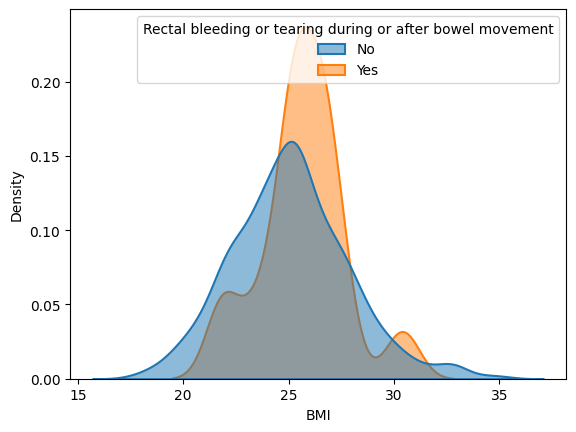

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example KDE plot
sns.kdeplot(
    data=df,
    x="BMI",
    hue="Rectal bleeding or tearing during or after bowel movement",
    fill=True,
    common_norm=False,
    palette="tab10",
    alpha=0.5,
    linewidth=1.5
)

# Display the plot
plt.show()

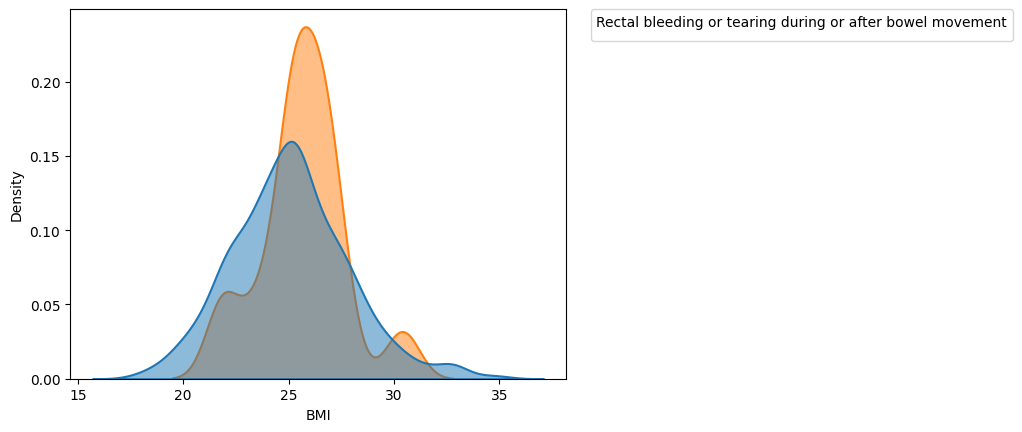

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example KDE plot
sns.kdeplot(
    data=df,
    x="BMI",
    hue="Rectal bleeding or tearing during or after bowel movement",
    fill=True,
    common_norm=False,
    palette="tab10",
    alpha=0.5,
    linewidth=1.5
)

# Adjust legend properties
plt.legend(title="Rectal bleeding or tearing during or after bowel movement",
           bbox_to_anchor=(1.05, 1), # Place legend outside the plot
           loc='upper left',
           borderaxespad=0.) # Reduce padding

# Display the plot
plt.show()

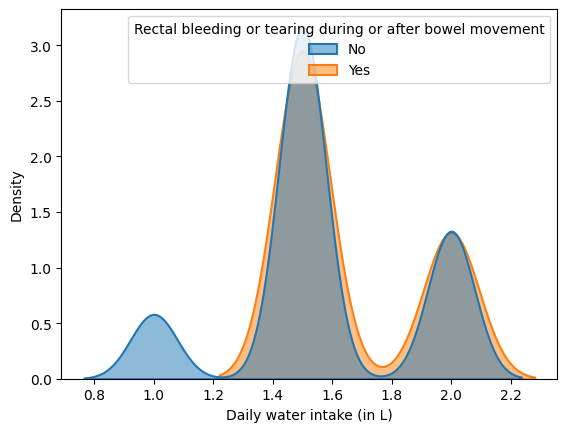

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example KDE plot for Daily water intake (in L)
ax = sns.kdeplot(
    data=df,
    x="Daily water intake (in L)",  # Change x to "Daily water intake (in L)"
    hue="Rectal bleeding or tearing during or after bowel movement",
    fill=True,
    common_norm=False,
    palette="tab10",
    alpha=0.5,
    linewidth=1.5
)

#

# Display the plot
plt.show()

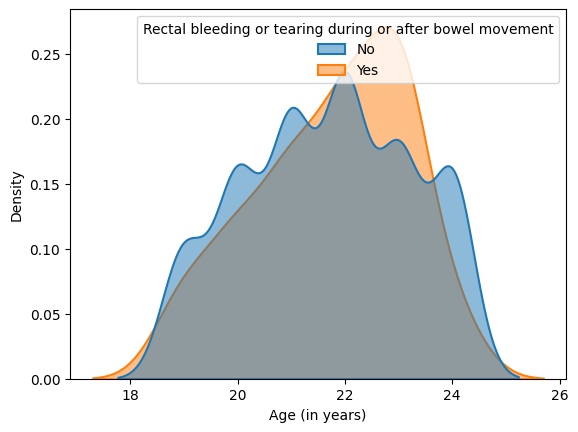

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example KDE plot for Age (in years)
ax = sns.kdeplot(
    data=df,
    x="Age (in years)",  # Change x to "Age (in years)"
    hue="Rectal bleeding or tearing during or after bowel movement",
    fill=True,
    common_norm=False,
    palette="tab10",
    alpha=0.5,
    linewidth=1.5
)

# Display the plot (legend will be inside by default)
plt.show()

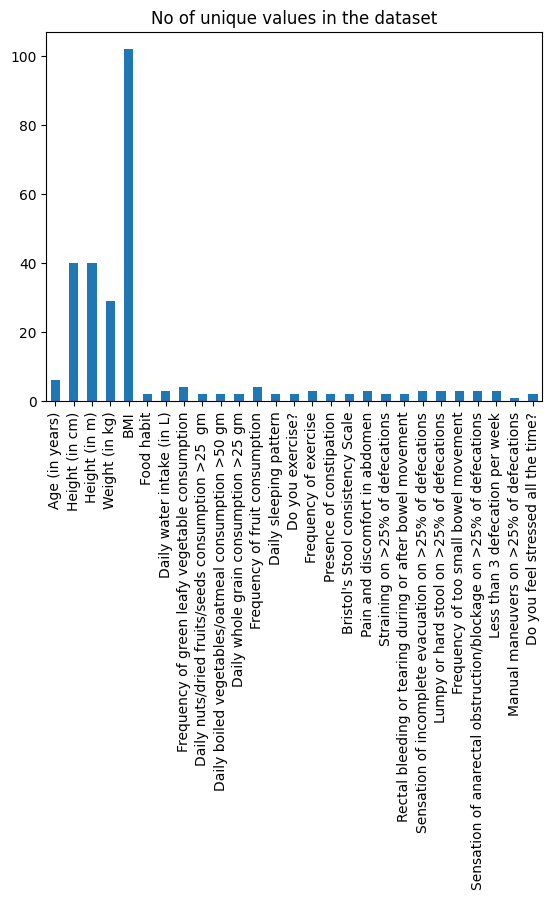

In [ ]:
df.nunique().plot(kind='bar')
plt.title('No of unique values in the dataset')
plt.show()

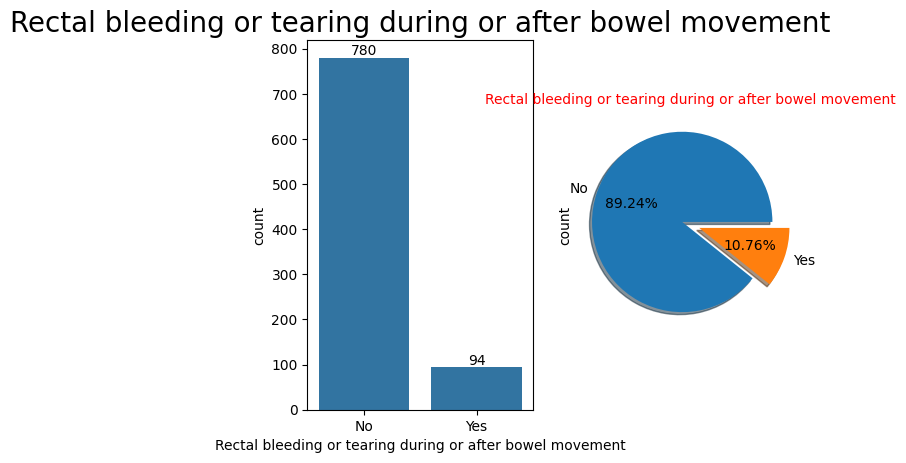

In [ ]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Rectal bleeding or tearing during or after bowel movement', data=df)
ax.bar_label(ax.containers[0])
plt.title("Rectal bleeding or tearing during or after bowel movement", fontsize=20)
ax =plt.subplot(1,2,2)
ax=df['Rectal bleeding or tearing during or after bowel movement'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Rectal bleeding or tearing during or after bowel movement", fontsize = 20,color='Red',font='Lucida Calligraphy');

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.5 MB/s eta 0:00:00


In [ ]:
# Print the column names in your DataFrame to see any discrepancies
print("Columns in DataFrame:", df.columns)

# Compare and adjust the list of columns if needed
# For example, trim spaces and ensure names match exactly
columns_for_encoding = [
    'Food habit',
    'Daily water intake (in L)',
    'Frequency of green leafy vegetable consumption',
    'Daily nuts/dried fruits/seeds consumption >25 gm',
    'Daily boiled vegetables/oatmeal consumption >50 gm',
    'Daily whole grain consumption >25 gm',
    'Frequency of fruit consumption',
    'Daily sleeping pattern',
    'Do you exercise?',
    'Frequency of exercise',
    'Presence of constipation',
    "Bristol's Stool consistency Scale",
    'Pain and discomfort in abdomen',
    'Straining on >25% of defecations',
    'Rectal bleeding or tearing during or after bowel movement',
    'Sensation of incomplete evacuation on >25% of defecations',
    'Lumpy or hard stool on >25% of defecations',
    'Frequency of too small bowel movement',
    'Sensation of anarectal obstruction/blockage on >25% of defecations',
    'Less than 3 defecation per week',
    'Manual maneuvers on >25% of defecations'
]

# Check if the columns now match and apply the encoder
encoder = ce.OrdinalEncoder(cols=columns_for_encoding)
df_final = encoder.fit_transform(df)

# Display the transformed DataFrame
print(df_final.head())


Columns in DataFrame: Index(['Age (in years)', 'Height (in cm)', 'Height (in m)', 'Weight (in kg)',
       'BMI', 'Food habit', 'Daily water intake (in L)',
       'Frequency of green leafy vegetable consumption',
       'Daily nuts/dried fruits/seeds consumption >25  gm',
       'Daily boiled vegetables/oatmeal consumption >50 gm',
       'Daily whole grain consumption >25 gm',
       'Frequency of fruit consumption', 'Daily sleeping pattern',
       'Do you exercise?', 'Frequency of exercise', 'Presence of constipation',
       'Bristol's Stool consistency Scale', 'Pain and discomfort in abdomen',
       'Straining on >25% of defecations',
       'Rectal bleeding or tearing during or after bowel movement',
       'Sensation of incomplete evacuation on >25% of defecations',
       'Lumpy or hard stool on >25% of defecations',
       'Frequency of too small bowel movement',
       'Sensation of anarectal obstruction/blockage on >25% of defecations',
       'Less than 3 defecation per w

NameError: name 'ce' is not defined

In [ ]:
# Import the category_encoders module with the alias 'ce'
import category_encoders as ce

# Print the column names in your DataFrame to see any discrepancies
print("Columns in DataFrame:", df.columns)

# Compare and adjust the list of columns if needed
# For example, trim spaces and ensure names match exactly
columns_for_encoding = [
    'Food habit',
    'Daily water intake (in L)',
    'Frequency of green leafy vegetable consumption',
    'Daily nuts/dried fruits/seeds consumption >25 gm',
    'Daily boiled vegetables/oatmeal consumption >50 gm',
    'Daily whole grain consumption >25 gm',
    'Frequency of fruit consumption',
    'Daily sleeping pattern',
    'Do you exercise?',
    'Frequency of exercise',
    'Presence of constipation',
    "Bristol's Stool consistency Scale",  # Check for case sensitivity
    'Pain and discomfort in abdomen',
    'Straining on >25% of defecations',
    'Rectal bleeding or tearing during or after bowel movement',
    'Sensation of incomplete evacuation on >25% of defecations',
    'Lumpy or hard stool on >25% of defecations',
    'Frequency of too small bowel movement',
    'Sensation of anarectal obstruction/blockage on >25% of defecations',
    'Less than 3 defecation per week',
    'Manual maneuvers on >25% of defecations'
]

# Ensure all columns in 'columns_for_encoding' are present in your DataFrame
columns_for_encoding = [col for col in columns_for_encoding if col in df.columns]

# Check if the columns now match and apply the encoder
encoder = ce.OrdinalEncoder(cols=columns_for_encoding)  # Now 'ce' is recognized
df_final = encoder.fit_transform(df)

# Display the transformed DataFrame
print(df_final.head())

Columns in DataFrame: Index(['Age (in years)', 'Height (in cm)', 'Height (in m)', 'Weight (in kg)',
       'BMI', 'Food habit', 'Daily water intake (in L)',
       'Frequency of green leafy vegetable consumption',
       'Daily nuts/dried fruits/seeds consumption >25  gm',
       'Daily boiled vegetables/oatmeal consumption >50 gm',
       'Daily whole grain consumption >25 gm',
       'Frequency of fruit consumption', 'Daily sleeping pattern',
       'Do you exercise?', 'Frequency of exercise', 'Presence of constipation',
       'Bristol's Stool consistency Scale', 'Pain and discomfort in abdomen',
       'Straining on >25% of defecations',
       'Rectal bleeding or tearing during or after bowel movement',
       'Sensation of incomplete evacuation on >25% of defecations',
       'Lumpy or hard stool on >25% of defecations',
       'Frequency of too small bowel movement',
       'Sensation of anarectal obstruction/blockage on >25% of defecations',
       'Less than 3 defecation per w

In [ ]:
# Confirming columns in your DataFrame
print(df.columns)


Index(['Age (in years)', 'Height (in cm)', 'Height (in m)', 'Weight (in kg)',
       'BMI', 'Food habit', 'Daily water intake (in L)',
       'Frequency of green leafy vegetable consumption',
       'Daily nuts/dried fruits/seeds consumption >25  gm',
       'Daily boiled vegetables/oatmeal consumption >50 gm',
       'Daily whole grain consumption >25 gm',
       'Frequency of fruit consumption', 'Daily sleeping pattern',
       'Do you exercise?', 'Frequency of exercise', 'Presence of constipation',
       'Bristol's Stool consistency Scale', 'Pain and discomfort in abdomen',
       'Straining on >25% of defecations',
       'Rectal bleeding or tearing during or after bowel movement',
       'Sensation of incomplete evacuation on >25% of defecations',
       'Lumpy or hard stool on >25% of defecations',
       'Frequency of too small bowel movement',
       'Sensation of anarectal obstruction/blockage on >25% of defecations',
       'Less than 3 defecation per week',
       'Manual m

In [ ]:
# Remove trailing spaces from column names
df.columns = df.columns.str.strip()

# List the columns again to check for spaces
print(df.columns)


Index(['Age (in years)', 'Height (in cm)', 'Height (in m)', 'Weight (in kg)',
       'BMI', 'Food habit', 'Daily water intake (in L)',
       'Frequency of green leafy vegetable consumption',
       'Daily nuts/dried fruits/seeds consumption >25  gm',
       'Daily boiled vegetables/oatmeal consumption >50 gm',
       'Daily whole grain consumption >25 gm',
       'Frequency of fruit consumption', 'Daily sleeping pattern',
       'Do you exercise?', 'Frequency of exercise', 'Presence of constipation',
       'Bristol's Stool consistency Scale', 'Pain and discomfort in abdomen',
       'Straining on >25% of defecations',
       'Rectal bleeding or tearing during or after bowel movement',
       'Sensation of incomplete evacuation on >25% of defecations',
       'Lumpy or hard stool on >25% of defecations',
       'Frequency of too small bowel movement',
       'Sensation of anarectal obstruction/blockage on >25% of defecations',
       'Less than 3 defecation per week',
       'Manual m

In [ ]:
df_final.head

<bound method NDFrame.head of      Age (in years)  Height (in cm)  Height (in m)  Weight (in kg)   BMI  \
0                23           161.5          1.615              67  25.7   
1                22           152.4          1.524              70  30.1   
2                21           170.6          1.706              68  23.4   
3                24           155.4          1.554              59  24.4   
4                23           149.8          1.498              68  30.3   
..              ...             ...            ...             ...   ...   
869              24           168.2          1.682              63  22.3   
870              19           152.4          1.524              58  25.0   
871              23           163.4          1.634              65  24.3   
872              21           163.9          1.639              59  22.0   
873              23           164.8          1.648              64  23.6   

     Food habit  Daily water intake (in L)  \
0             1                          1   
1             1                          1   
2             1                          1   
3             1                          2   
4             1                          1   
..          ...                        ...   
869           1                          1   
870           1                          1   
871           1                          1   
872           1                          2   
873           1                          1   

     Frequency of green leafy vegetable consumption  \
0                                                 1   
1                                                 2   
2                                                 2   
3                                                 3   
4                                                 2   
..                                              ...   
869                                               2   
870                                               2   
871                                               2   
872                                               3   
873                                               2   

    Daily nuts/dried fruits/seeds consumption >25  gm  \
0                                                 Yes   
1                                                 Yes   
2                                                 Yes   
3                                                 Yes   
4                                                 Yes   
..                                                ...   
869                                               Yes   
870                                               Yes   
871                                               Yes   
872                                                No   
873                                               Yes   

     Daily boiled vegetables/oatmeal consumption >50 gm  ...  \
0                                                    1   ...   
1                                                    1   ...   
2                                                    1   ...   
3                                                    1   ...   
4                                                    1   ...   
..                                                 ...   ...   
869                                                  1   ...   
870                                                  1   ...   
871                                                  1   ...   
872                                                  2   ...   
873                                                  1   ...   

     Pain and discomfort in abdomen  Straining on >25% of defecations  \
0                                 1                                 1   
1                                 1                                 1   
2                                 1                                 1   
3                                 2                                 1   
4                       

In [ ]:
X = df_final.drop('Rectal bleeding or tearing during or after bowel movement',axis=1)
y = df_final['Rectal bleeding or tearing during or after bowel movement']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

# Load your DataFrame (df_final should be defined)
# df_final = pd.read_csv('your_data.csv')  # Uncomment this line to load your dataset

# Separate features and target variable
X = df_final.drop('Rectal bleeding or tearing during or after bowel movement', axis=1)
y = df_final['Rectal bleeding or tearing during or after bowel movement']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Apply SMOTE for class balancing on training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scaling dataset with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_balanced)  # Fit on balanced training data
X_train_scaled = scaler.transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Converting scaled arrays back to DataFrames for consistency
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Displaying the first few rows of the scaled DataFrames
print("Scaled Training Data:")
display(X_train_scaled.head())

print("Scaled Testing Data:")
display(X_test_scaled.head())


ValueError: could not convert string to float: 'Yes'

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Assuming 'df_final' is your DataFrame (uncomment the following line if loading from a file)
# df_final = pd.read_csv('your_data.csv')

# Remove trailing spaces from column names (if needed)
df_final.columns = df_final.columns.str.strip()

# Separate features and target variable
X = df_final.drop('Rectal bleeding or tearing during or after bowel movement', axis=1)
y = df_final['Rectal bleeding or tearing during or after bowel movement']

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y = le.fit_transform(y)

# Fit and transform categorical features in X
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Apply SMOTE for class balancing on training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scaling dataset with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_balanced)
X_train_scaled = scaler.transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Converting scaled arrays back to DataFrames for consistency
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Displaying the first few rows of the scaled DataFrames
print("Scaled Training Data:")
display(X_train_scaled.head())

print("Scaled Testing Data:")
display(X_test_scaled.head())

Scaled Training Data:


,Age (in years),Height (in cm),Height (in m),Weight (in kg),BMI,Food habit,Daily water intake (in L),Frequency of green leafy vegetable consumption,Daily nuts/dried fruits/seeds consumption >25 gm,Daily boiled vegetables/oatmeal consumption >50 gm,...,Bristol's Stool consistency Scale,Pain and discomfort in abdomen,Straining on >25% of defecations,Sensation of incomplete evacuation on >25% of defecations,Lumpy or hard stool on >25% of defecations,Frequency of too small bowel movement,Sensation of anarectal obstruction/blockage on >25% of defecations,Less than 3 defecation per week,Manual maneuvers on >25% of defecations,Do you feel stressed all the time?
0,0.2,0.573222,0.573222,0.454545,0.423529,1.0,1.0,0.666667,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.8,0.372385,0.372385,0.393939,0.464706,0.0,0.5,0.000000,0.0,1.0,...,1.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.4,0.322176,0.322176,0.212121,0.347059,0.0,0.5,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.4,0.334728,0.334728,0.515152,0.576471,0.0,0.5,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.8,1.000000,1.000000,0.424242,0.235294,0.0,0.5,0.666667,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,0.0,1.0


Scaled Testing Data:


,Age (in years),Height (in cm),Height (in m),Weight (in kg),BMI,Food habit,Daily water intake (in L),Frequency of green leafy vegetable consumption,Daily nuts/dried fruits/seeds consumption >25 gm,Daily boiled vegetables/oatmeal consumption >50 gm,...,Bristol's Stool consistency Scale,Pain and discomfort in abdomen,Straining on >25% of defecations,Sensation of incomplete evacuation on >25% of defecations,Lumpy or hard stool on >25% of defecations,Frequency of too small bowel movement,Sensation of anarectal obstruction/blockage on >25% of defecations,Less than 3 defecation per week,Manual maneuvers on >25% of defecations,Do you feel stressed all the time?
0,0.4,0.690377,0.690377,0.545455,0.435294,0.0,0.5,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.0,1.0
1,1.0,0.769874,0.769874,0.636364,0.464706,0.0,0.5,1.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.573222,0.573222,0.424242,0.400000,0.0,0.5,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.288703,0.288703,0.333333,0.458824,0.0,0.0,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.4,0.870293,0.870293,0.484848,0.323529,0.0,0.0,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
## Logistic Regression##
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_log, y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_log, y_test) * 100, 2)

print("Training Accuracy    :",log_train,"%")
print("Model Accuracy Score :",log_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_log))

Training Accuracy    : 99.14 %
Model Accuracy Score : 97.14 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       156
           1       0.85      0.89      0.87        19

    accuracy                           0.97       175
   macro avg       0.92      0.94      0.93       175
weighted avg       0.97      0.97      0.97       175



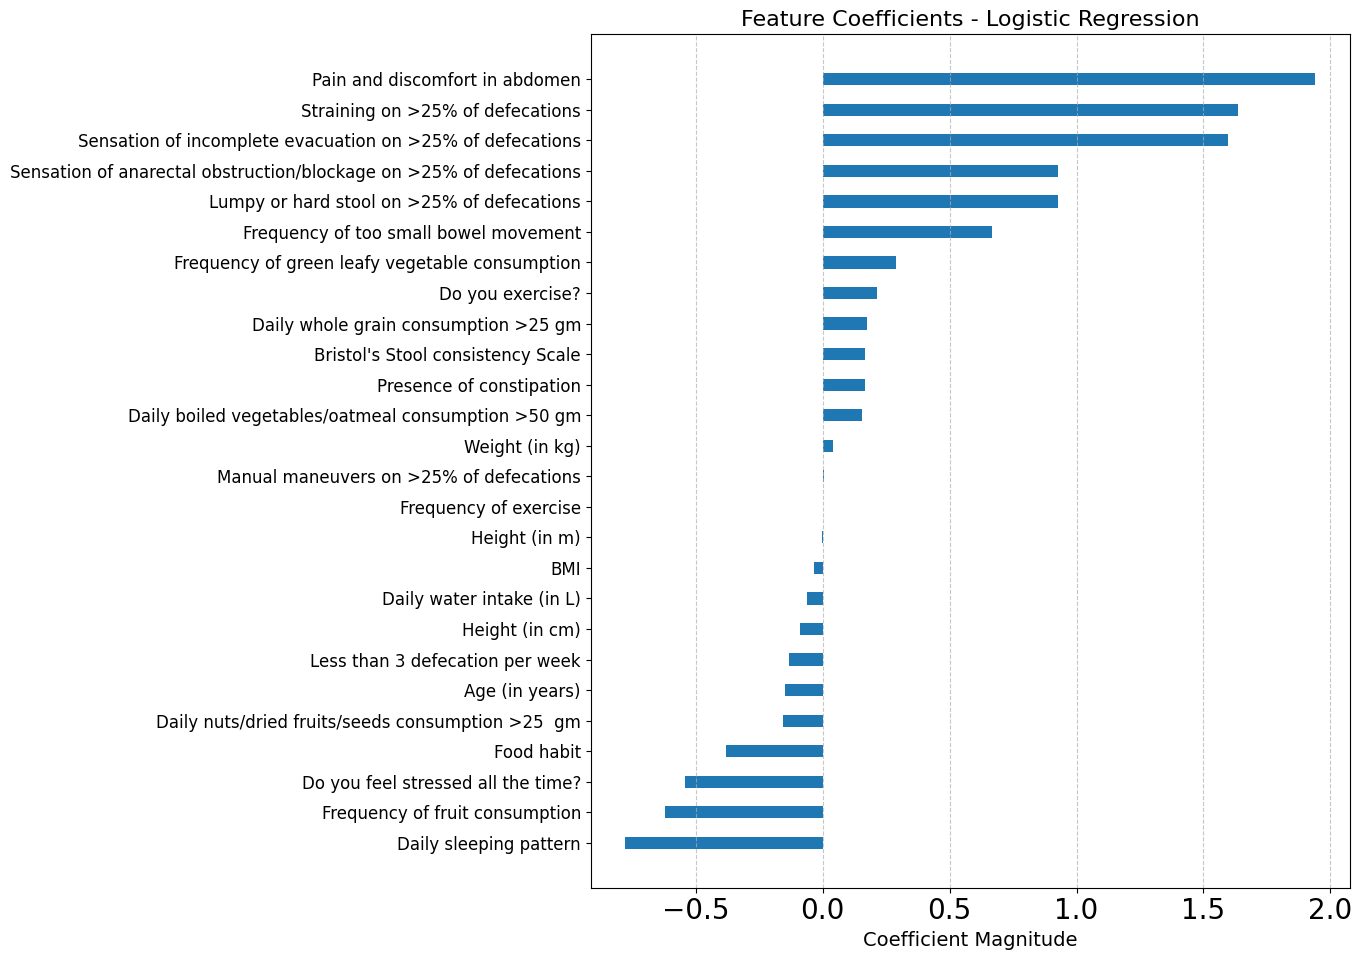

Daily sleeping pattern: -0.7778059875432768
Frequency of fruit consumption: -0.619808943389307
Do you feel stressed all the time?: -0.542369723067078
Food habit: -0.3802801580885651
Daily nuts/dried fruits/seeds consumption >25  gm: -0.158014632087692
Age (in years): -0.1464937975883221
Less than 3 defecation per week: -0.13449488027541298
Height (in cm): -0.08866801291342656
Daily water intake (in L): -0.06346659990494333
BMI: -0.033798825940079935
Height (in m): -0.0008866801291336399
Frequency of exercise: 0.0016022301024492445
Manual maneuvers on >25% of defecations: 0.005060731919596248
Weight (in kg): 0.04242730210752472
Daily boiled vegetables/oatmeal consumption >50 gm: 0.15640504091452684
Presence of constipation: 0.16743400627705285
Bristol's Stool consistency Scale: 0.16743400627705285
Daily whole grain consumption >25 gm: 0.17386335152852922
Do you exercise?: 0.21544845672804153
Frequency of green leafy vegetable consumption: 0.2887626755481763
Frequency of too small bowel 

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Assuming you have trained a logistic regression model (logreg) and have feature names (features)
# Define and train your logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get coefficients and feature names
coefficients = logreg.coef_[0]
features = X_train.columns

# Sort feature coefficients
indices = coefficients.argsort()

# Plot horizontal bar chart
plt.figure(figsize=(14, 10))  # Further increase the figure size
plt.barh(range(len(indices)), coefficients[indices], align='center', height=0.4)  # Adjust bar height

# Set y-tick labels and style
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=12, fontname='Arial')  # Set font to Arial
plt.xlabel('Coefficient Magnitude', fontsize=14, fontname='Arial')
plt.title('Feature Coefficients - Logistic Regression', fontsize=16, fontname='Arial')

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Optional: Add a grid for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Print feature names and corresponding coefficients
for i in range(len(indices)):
    print(f"{features[indices[i]]}: {coefficients[indices[i]]}")



Accuracy: 0.9714285714285714

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       156
           1       0.79      1.00      0.88        19

    accuracy                           0.97       175
   macro avg       0.90      0.98      0.93       175
weighted avg       0.98      0.97      0.97       175


Confusion Matrix:
[[151   5]
 [  0  19]]


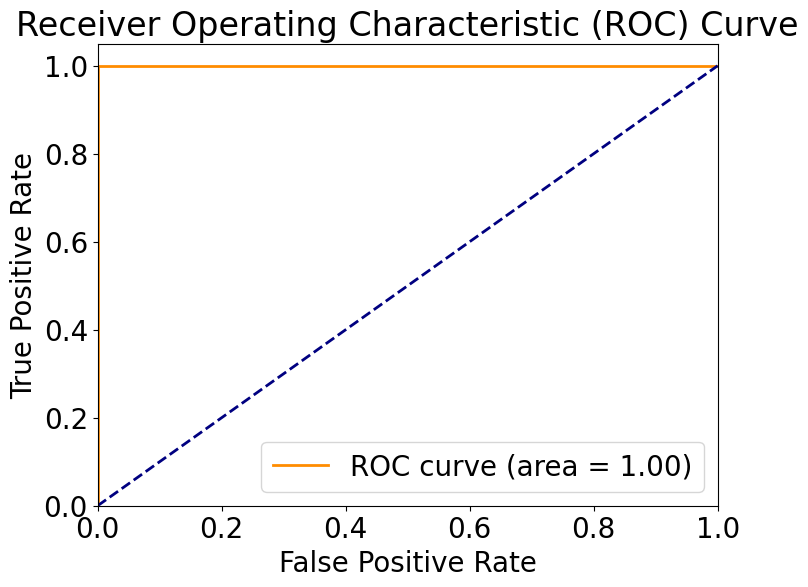

In [ ]:
!pip install xgboost
!pip install imblearn

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


# Assuming 'df_final' is your DataFrame (uncomment the following line if loading from a file)
# df_final = pd.read_csv('your_data.csv')

# Remove trailing spaces from column names (if needed)
df_final.columns = df_final.columns.str.strip()

# Separate features and target variable
X = df_final.drop('Rectal bleeding or tearing during or after bowel movement', axis=1)
y = df_final['Rectal bleeding or tearing during or after bowel movement']

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y = le.fit_transform(y)

# Fit and transform categorical features in X
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Apply SMOTE for class balancing on training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scaling dataset with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_balanced)
X_train_scaled = scaler.transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Converting scaled arrays back to DataFrames for consistency
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train_scaled, y_train_balanced)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_scaled)
y_pred_proba = xgb_classifier.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for class 1

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.9714285714285714

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       156
           1       0.79      1.00      0.88        19

    accuracy                           0.97       175
   macro avg       0.90      0.98      0.93       175
weighted avg       0.98      0.97      0.97       175



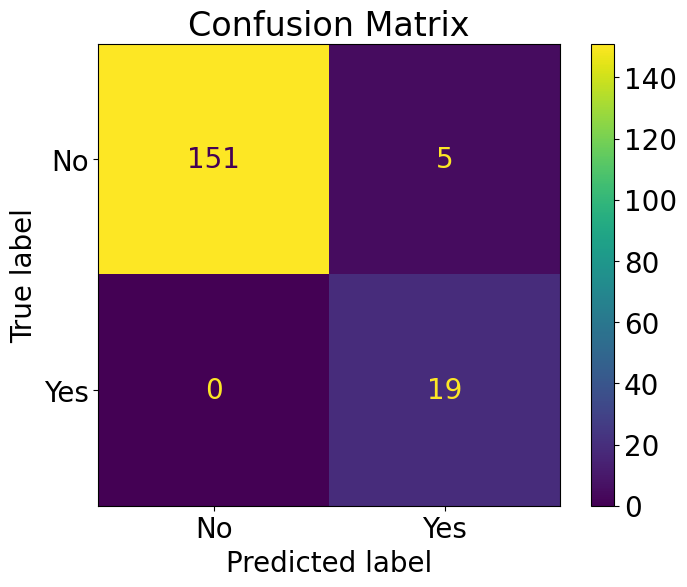

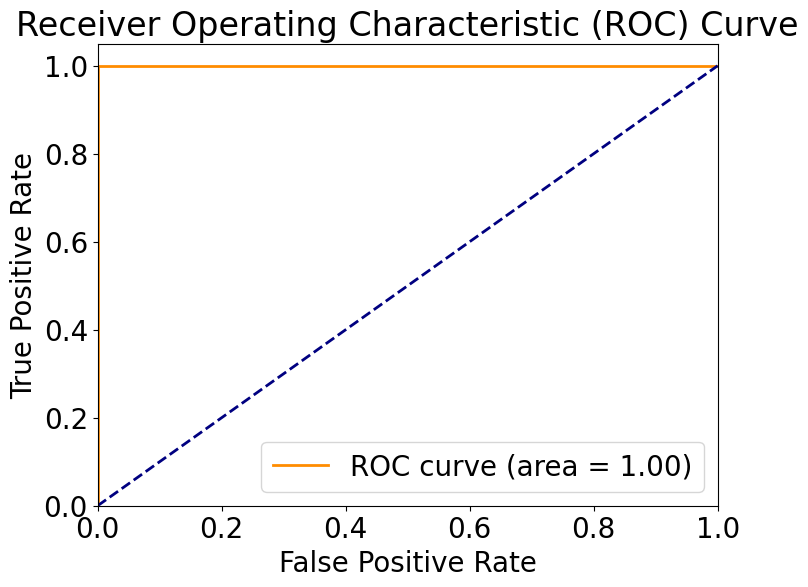

In [ ]:
!pip install xgboost
!pip install imblearn

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Assuming 'df_final' is your DataFrame (uncomment the following line if loading from a file)
# df_final = pd.read_csv('your_data.csv')

# Remove trailing spaces from column names (if needed)
df_final.columns = df_final.columns.str.strip()

# Separate features and target variable
X = df_final.drop('Rectal bleeding or tearing during or after bowel movement', axis=1)
y = df_final['Rectal bleeding or tearing during or after bowel movement']

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y = le.fit_transform(y)

# Fit and transform categorical features in X
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Apply SMOTE for class balancing on training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scaling dataset with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_balanced)
X_train_scaled = scaler.transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Converting scaled arrays back to DataFrames for consistency
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train_scaled, y_train_balanced)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_scaled)
y_pred_proba = xgb_classifier.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for class 1

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Display
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_) # Assuming le is your LabelEncoder
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

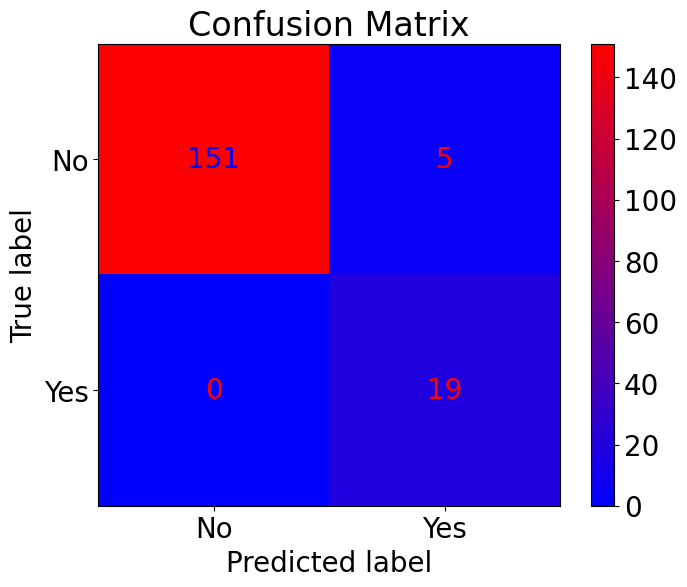

In [ ]:
!pip install xgboost
!pip install imblearn

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming 'df_final' is your DataFrame (uncomment the following line if loading from a file)
# df_final = pd.read_csv('your_data.csv')

# ... (rest of the code remains the same) ...

# Confusion Matrix Display with custom colors
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Create a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list("mycmap", ["blue", "red"]) # Create a colormap from blue to red

disp.plot(cmap=cmap)  # Use the custom colormap
plt.title('Confusion Matrix')
plt.show()

# ... (rest of the code remains the same) ...

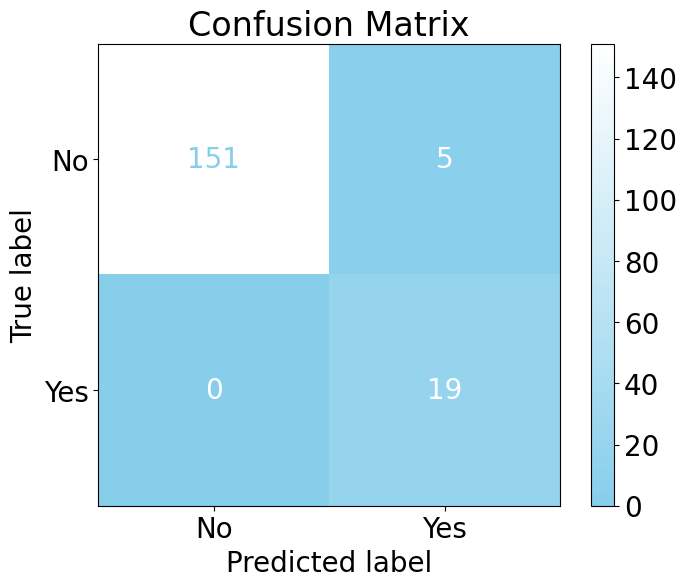

In [ ]:
!pip install xgboost
!pip install imblearn

# ... (Import necessary libraries) ...

# ... (Data preprocessing and model training) ...

# Confusion Matrix Display with custom colors
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Create a custom colormap using sky blue and white
cmap = mcolors.LinearSegmentedColormap.from_list("mycmap", ["skyblue", "white"])

disp.plot(cmap=cmap)
plt.title('Confusion Matrix')
plt.show()

# ... (rest of the code remains the same) ...

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, mean_squared_error, mean_absolute_error, roc_auc_score, classification_report, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your training data (X_train, y_train) and test data (X_test, y_test)
# Define and train your Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get predictions
y_pred_logreg = logreg.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_logreg) * 100

# Calculate Kappa Statistics
kappa_stat = cohen_kappa_score(y_test, y_pred_logreg)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred_logreg, squared=False)

# Calculate Relative Absolute Error
rae = mean_absolute_error(y_test, y_pred_logreg) / len(y_test)

# Calculate True Positive Rate and False Positive Rate
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
true_positive_rate = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate Precision, F-Measure, ROC Area
precision = precision_score(y_test, y_pred_logreg)
f_measure = f1_score(y_test, y_pred_logreg)
roc_area = roc_auc_score(y_test, y_pred_logreg)

# Printing the calculated metrics
print("Model Accuracy Score:", accuracy)
print("Kappa Statistics:", kappa_stat)
print("Root Mean Squared Error:", rmse)
print("Relative Absolute Error:", rae)
print("True Positive Rate:", true_positive_rate)
print("False Positive Rate:", false_positive_rate)
print("Precision:", precision)
print("F-Measure:", f_measure)
print("ROC Area:", roc_area)

print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_logreg))


Model Accuracy Score: 97.14285714285714
Kappa Statistics: 0.8557295960428689
Root Mean Squared Error: 0.1690308509457033
Relative Absolute Error: 0.00016326530612244898
True Positive Rate: 0.8947368421052632
False Positive Rate: 0.019230769230769232
Precision: 0.85
F-Measure: 0.8717948717948718
ROC Area: 0.9377530364372471
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       156
           1       0.85      0.89      0.87        19

    accuracy                           0.97       175
   macro avg       0.92      0.94      0.93       175
weighted avg       0.97      0.97      0.97       175



In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Set the font globally to Arial
plt.rcParams['font.family'] = 'Arial'

# Assuming logreg is your trained Logistic Regression model
# Plot confusion matrix with custom color map
plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues')  # Use the 'Blues' color map

# Set title with model name
plt.title('Confusion Matrix - Logistic Regression Model', fontsize=16)

# Show the plot
plt.show()



ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

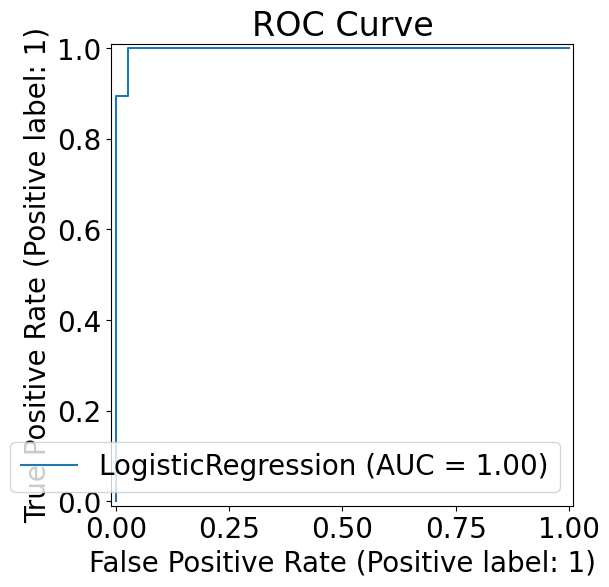

In [ ]:
!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Assuming 'logreg', 'X_test', and 'y_test' are defined

RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=logreg, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 99.14 %
Std. Dev: 1.31 %


In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)
svc_f1 = round(f1_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy     :",svc_train,"%")
print("Model Accuracy Score  :",svc_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))


Training Accuracy     : 89.27 %
Model Accuracy Score  : 89.14 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       156
           1       0.00      0.00      0.00        19

    accuracy                           0.89       175
   macro avg       0.45      0.50      0.47       175
weighted avg       0.79      0.89      0.84       175



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, mean_squared_error, mean_absolute_error, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your training data (X_train, y_train) and test data (X_test, y_test)
# Define and train your SVM model
svc = SVC()
svc.fit(X_train, y_train)

# Get predictions
y_pred_svc = svc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_svc) * 100

# Calculate Kappa Statistics
kappa_stat = cohen_kappa_score(y_test, y_pred_svc)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred_svc, squared=False)

# Calculate Relative Absolute Error
rae = mean_absolute_error(y_test, y_pred_svc) / len(y_test)

# Calculate True Positive Rate and False Positive Rate
conf_matrix = confusion_matrix(y_test, y_pred_svc)
true_positive_rate = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate Precision, F-Measure, ROC Area
precision = precision_score(y_test, y_pred_svc)
f_measure = f1_score(y_test, y_pred_svc)
roc_area = roc_auc_score(y_test, y_pred_svc)

# Printing the calculated metrics
print("Model Accuracy Score:", accuracy)
print("Kappa Statistics:", kappa_stat)
print("Root Mean Squared Error:", rmse)
print("Relative Absolute Error:", rae)
print("True Positive Rate:", true_positive_rate)
print("False Positive Rate:", false_positive_rate)
print("Precision:", precision)
print("F-Measure:", f_measure)
print("ROC Area:", roc_area)

print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_svc))



Model Accuracy Score: 89.14285714285714
Kappa Statistics: 0.0
Root Mean Squared Error: 0.3295017884191656
Relative Absolute Error: 0.0006204081632653061
True Positive Rate: 0.0
False Positive Rate: 0.0
Precision: 0.0
F-Measure: 0.0
ROC Area: 0.5
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       156
           1       0.00      0.00      0.00        19

    accuracy                           0.89       175
   macro avg       0.45      0.50      0.47       175
weighted avg       0.79      0.89      0.84       175



Model Accuracy Score: 89.14285714285714
Kappa Statistics: 0.0
Root Mean Squared Error: 0.3295017884191656
Relative Absolute Error: 0.0006204081632653061
True Positive Rate: 0.0
False Positive Rate: 0.0
Precision: 0.0
F-Measure: 0.0
ROC Area: 0.9878542510121457
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       156
           1       0.00      0.00      0.00        19

    accuracy                           0.89       175
   macro avg       0.45      0.50      0.47       175
weighted avg       0.79      0.89      0.84       175



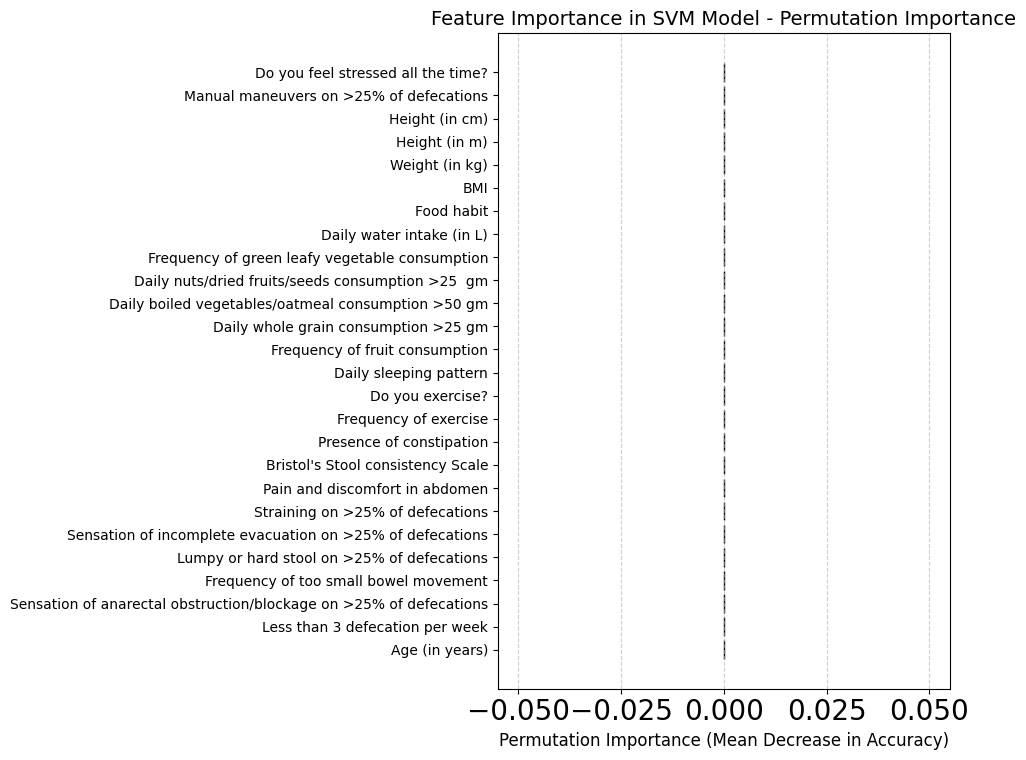

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, confusion_matrix, cohen_kappa_score, mean_squared_error,
    mean_absolute_error, roc_auc_score, classification_report, precision_score, f1_score
)
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Define and train your SVM model
svc = SVC(probability=True)  # Enable probability estimates for ROC AUC score calculation
svc.fit(X_train, y_train)

# Get predictions
y_pred_svc = svc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_svc) * 100

# Calculate Kappa Statistics
kappa_stat = cohen_kappa_score(y_test, y_pred_svc)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred_svc, squared=False)

# Calculate Relative Absolute Error
rae = mean_absolute_error(y_test, y_pred_svc) / len(y_test)

# Calculate True Positive Rate and False Positive Rate
conf_matrix = confusion_matrix(y_test, y_pred_svc)
true_positive_rate = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate Precision, F-Measure, ROC Area
precision = precision_score(y_test, y_pred_svc)
f_measure = f1_score(y_test, y_pred_svc)
roc_area = roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1])

# Printing the calculated metrics
print("Model Accuracy Score:", accuracy)
print("Kappa Statistics:", kappa_stat)
print("Root Mean Squared Error:", rmse)
print("Relative Absolute Error:", rae)
print("True Positive Rate:", true_positive_rate)
print("False Positive Rate:", false_positive_rate)
print("Precision:", precision)
print("F-Measure:", f_measure)
print("ROC Area:", roc_area)

print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_svc))

# Calculate and plot permutation importance for feature ranking
perm_importance = permutation_importance(svc, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

# Adjusting the plot for better visibility
plt.figure(figsize=(10, 8))
plt.barh(
    range(len(sorted_idx)),
    perm_importance.importances_mean[sorted_idx],
    color='royalblue',
    edgecolor='black'
)
plt.yticks(
    range(len(sorted_idx)),
    [X_test.columns[i] for i in sorted_idx],
    fontfamily='Arial',
    fontsize=10
)
plt.xlabel('Permutation Importance (Mean Decrease in Accuracy)', fontsize=12)
plt.title('Feature Importance in SVM Model - Permutation Importance', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, mean_squared_error, mean_absolute_error, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your training data (X_train, y_train) and test data (X_test, y_test)
# Define and train your SVM model
svc = SVC()
svc.fit(X_train, y_train)

# Get predictions
y_pred_svc = svc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_svc) * 100

# Calculate Kappa Statistics
kappa_stat = cohen_kappa_score(y_test, y_pred_svc)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred_svc, squared=False)

# Calculate Relative Absolute Error
rae = mean_absolute_error(y_test, y_pred_svc) / len(y_test)

# Calculate True Positive Rate and False Positive Rate
conf_matrix = confusion_matrix(y_test, y_pred_svc)
true_positive_rate = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate Precision, F-Measure, ROC Area
precision = precision_score(y_test, y_pred_svc)
f_measure = f1_score(y_test, y_pred_svc)
roc_area = roc_auc_score(y_test, y_pred_svc)

# Printing the calculated metrics
print("Model Accuracy Score:", accuracy)
print("Kappa Statistics:", kappa_stat)
print("Root Mean Squared Error:", rmse)
print("Relative Absolute Error:", rae)
print("True Positive Rate:", true_positive_rate)
print("False Positive Rate:", false_positive_rate)
print("Precision:", precision)
print("F-Measure:", f_measure)
print("ROC Area:", roc_area)

print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_svc))


Model Accuracy Score: 89.14285714285714
Kappa Statistics: 0.0
Root Mean Squared Error: 0.3295017884191656
Relative Absolute Error: 0.0006204081632653061
True Positive Rate: 0.0
False Positive Rate: 0.0
Precision: 0.0
F-Measure: 0.0
ROC Area: 0.5
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       156
           1       0.00      0.00      0.00        19

    accuracy                           0.89       175
   macro avg       0.45      0.50      0.47       175
weighted avg       0.79      0.89      0.84       175



In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=svc, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 89.27 %
Std. Dev: 0.70 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
knn_f1 = round(f1_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy     :",knn_train,"%")
print("Model Accuracy Score  :",knn_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))

Training Accuracy     : 99.86 %
Model Accuracy Score  : 98.86 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       156
           1       0.90      1.00      0.95        19

    accuracy                           0.99       175
   macro avg       0.95      0.99      0.97       175
weighted avg       0.99      0.99      0.99       175



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, mean_squared_error, mean_absolute_error, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your training data (X_train, y_train) and test data (X_test, y_test)
# Define and train your KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Get predictions
y_pred_knn = knn.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_knn) * 100

# Calculate Kappa Statistics
kappa_stat = cohen_kappa_score(y_test, y_pred_knn)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred_knn, squared=False)

# Calculate Relative Absolute Error
rae = mean_absolute_error(y_test, y_pred_knn) / len(y_test)

# Calculate True Positive Rate and False Positive Rate
conf_matrix = confusion_matrix(y_test, y_pred_knn)
true_positive_rate = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate Precision, F-Measure, ROC Area
precision = precision_score(y_test, y_pred_knn)
f_measure = f1_score(y_test, y_pred_knn)
roc_area = roc_auc_score(y_test, y_pred_knn)

# Printing the calculated metrics
print("Model Accuracy Score:", accuracy)
print("Kappa Statistics:", kappa_stat)
print("Root Mean Squared Error:", rmse)
print("Relative Absolute Error:", rae)
print("True Positive Rate:", true_positive_rate)
print("False Positive Rate:", false_positive_rate)
print("Precision:", precision)
print("F-Measure:", f_measure)
print("ROC Area:", roc_area)

print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_knn))


Model Accuracy Score: 98.85714285714286
Kappa Statistics: 0.9435665914221218
Root Mean Squared Error: 0.10690449676496976
Relative Absolute Error: 6.530612244897959e-05
True Positive Rate: 1.0
False Positive Rate: 0.01282051282051282
Precision: 0.9047619047619048
F-Measure: 0.95
ROC Area: 0.9935897435897436
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       156
           1       0.90      1.00      0.95        19

    accuracy                           0.99       175
   macro avg       0.95      0.99      0.97       175
weighted avg       0.99      0.99      0.99       175



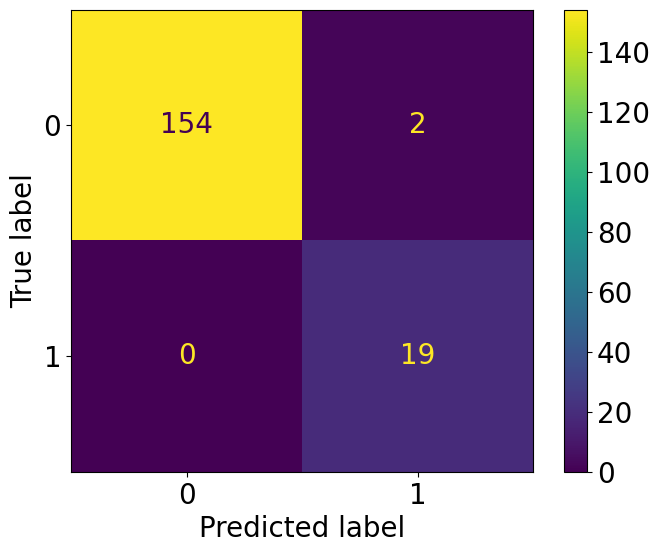

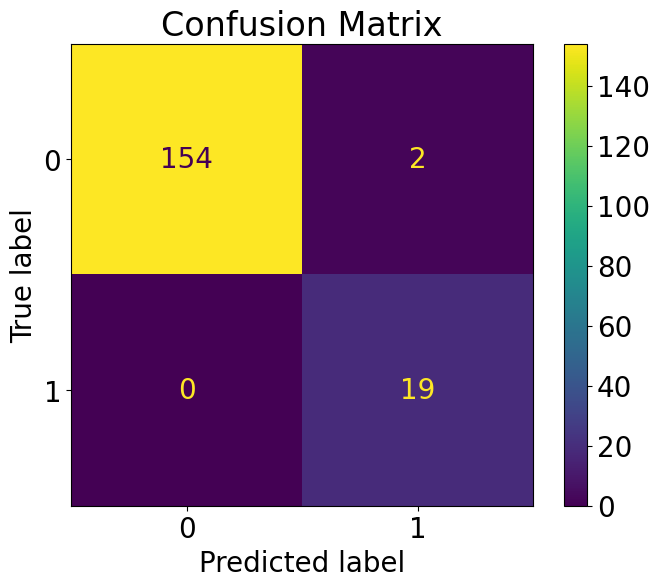

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay

# ... other imports ...

# Assuming 'knn', 'X_test', and 'y_test' are already defined

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

# Display the plot
disp.plot()
plt.title('Confusion Matrix');

In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=knn, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 99.28 %
Std. Dev: 1.32 %


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_NB = gaussian.predict(X_test)

gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_accuracy = round(accuracy_score(y_pred_NB, y_test) * 100, 2)
gaussian_f1 = round(f1_score(y_pred_NB, y_test) * 100, 2)

print("Training Accuracy     :",gaussian_train,"%")
print("Model Accuracy Score  :",gaussian_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_NB))

Training Accuracy     : 95.14 %
Model Accuracy Score  : 93.14 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       156
           1       0.61      1.00      0.76        19

    accuracy                           0.93       175
   macro avg       0.81      0.96      0.86       175
weighted avg       0.96      0.93      0.94       175



In [ ]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd

# Assuming you have your training data (X_train, y_train)
# Define and train your Gaussian Naive Bayes model
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

# Get mean and variance for each class and feature
mean_df = pd.DataFrame(gaussian.theta_, columns=X_train.columns, index=gaussian.classes_)
# Use 'var_' instead of 'sigma_' to access the variance
variance_df = pd.DataFrame(gaussian.var_, columns=X_train.columns, index=gaussian.classes_)

print("Mean values for each feature and class:")
print(mean_df)

print("\nVariance values for each feature and class:")
print(variance_df)

Mean values for each feature and class:
   Age (in years)  Height (in cm)  Height (in m)  Weight (in kg)        BMI  \
0       21.644231      160.645673       1.606457       64.519231  25.054327   
1       21.693333      162.856000       1.628560       67.733333  25.560000   

   Food habit  Daily water intake (in L)  \
0    1.020833                   1.836538   
1    1.000000                   1.680000   

   Frequency of green leafy vegetable consumption  \
0                                        2.072115   
1                                        2.546667   

   Daily nuts/dried fruits/seeds consumption >25  gm  \
0                                           0.858974   
1                                           0.000000   

   Daily boiled vegetables/oatmeal consumption >50 gm  ...  \
0                                           1.149038   ...   
1                                           2.000000   ...   

   Bristol's Stool consistency Scale  Pain and discomfort in abdomen  \
0

In [ ]:
# Assuming you have your training data (X_train, y_train) and test data (X_test, y_test)
# Define and train your Gaussian Naive Bayes model
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

# Get predictions
y_pred_gaussian = gaussian.predict(X_test) # This line defines y_pred_gaussian

# Now you can calculate the metrics using y_pred_gaussian
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_gaussian) * 100

# Calculate Kappa Statistics
kappa_stat = cohen_kappa_score(y_test, y_pred_gaussian)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred_gaussian, squared=False)

# Calculate Relative Absolute Error
rae = mean_absolute_error(y_test, y_pred_gaussian) / len(y_test)

# Calculate True Positive Rate and False Positive Rate
conf_matrix = confusion_matrix(y_test, y_pred_gaussian)
true_positive_rate = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate Precision, F-Measure, ROC Area
precision = precision_score(y_test, y_pred_gaussian)
f_measure = f1_score(y_test, y_pred_gaussian)
roc_area = roc_auc_score(y_test, y_pred_gaussian)

# Printing the calculated metrics
print("Model Accuracy Score:", accuracy)
print("Kappa Statistics:", kappa_stat)
print("Root Mean Squared Error:", rmse)
print("Relative Absolute Error:", rae)
print("True Positive Rate:", true_positive_rate)
print("False Positive Rate:", false_positive_rate)
print("Precision:", precision)
print("F-Measure:", f_measure)
print("ROC Area:", roc_area)

print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_gaussian))

Model Accuracy Score: 93.14285714285714
Kappa Statistics: 0.722662440570523
Root Mean Squared Error: 0.26186146828319085
Relative Absolute Error: 0.0003918367346938776
True Positive Rate: 1.0
False Positive Rate: 0.07692307692307693
Precision: 0.6129032258064516
F-Measure: 0.76
ROC Area: 0.9615384615384616
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       156
           1       0.61      1.00      0.76        19

    accuracy                           0.93       175
   macro avg       0.81      0.96      0.86       175
weighted avg       0.96      0.93      0.94       175



In [ ]:
# Perceptron  # Added '#' to make it a comment

from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)


perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(y_pred_perceptron, y_test) * 100, 2)
perceptron_f1 = round(f1_score(y_pred_perceptron, y_test) * 100, 2)

print("Training Accuracy    :",perceptron_train,"%")
print("Model Accuracy Score :",perceptron_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_perceptron))

Training Accuracy    : 91.7 %
Model Accuracy Score : 82.86 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       156
           1       0.39      1.00      0.56        19

    accuracy                           0.83       175
   macro avg       0.69      0.90      0.73       175
weighted avg       0.93      0.83      0.86       175



In [ ]:
# Perceptron

from sklearn.linear_model import Perceptron
import pandas as pd
import numpy as np

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)

# Get feature importance (coefficients)
feature_importance = perceptron.coef_[0]

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(y_pred_perceptron, y_test) * 100, 2)
perceptron_f1 = round(f1_score(y_pred_perceptron, y_test) * 100, 2)

print("\nTraining Accuracy    :",perceptron_train,"%")
print("Model Accuracy Score :",perceptron_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_perceptron))

Feature Importance:
                                              Feature  Importance
19  Sensation of incomplete evacuation on >25% of ...     928.000
17                     Pain and discomfort in abdomen     865.000
20         Lumpy or hard stool on >25% of defecations     857.000
22  Sensation of anarectal obstruction/blockage on...     857.000
23                    Less than 3 defecation per week     699.000
21              Frequency of too small bowel movement     654.000
18                   Straining on >25% of defecations     493.000
16                  Bristol's Stool consistency Scale     428.000
15                           Presence of constipation     428.000
10               Daily whole grain consumption >25 gm     422.000
9   Daily boiled vegetables/oatmeal consumption >5...     418.000
3                                      Weight (in kg)     406.000
7      Frequency of green leafy vegetable consumption     242.000
14                              Frequency of exercise   

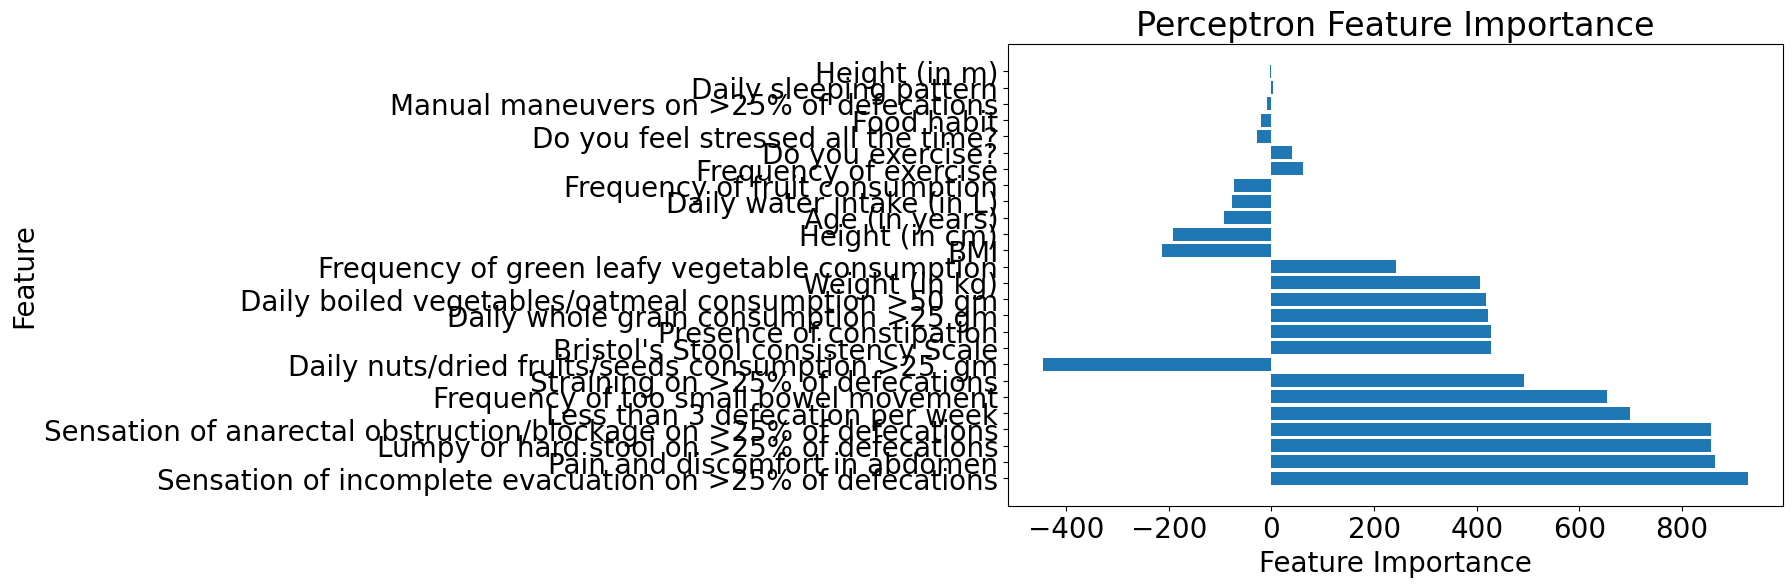


Training Accuracy    : 91.7 %
Model Accuracy Score : 82.86 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       156
           1       0.39      1.00      0.56        19

    accuracy                           0.83       175
   macro avg       0.69      0.90      0.73       175
weighted avg       0.93      0.83      0.86       175



In [ ]:
# Perceptron

from sklearn.linear_model import Perceptron
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)

# Get feature importance (coefficients)
feature_importance = perceptron.coef_[0]

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort by absolute importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', key=abs, ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Perceptron Feature Importance")
plt.show()

perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(y_pred_perceptron, y_test) * 100, 2)
perceptron_f1 = round(f1_score(y_pred_perceptron, y_test) * 100, 2)

print("\nTraining Accuracy    :",perceptron_train,"%")
print("Model Accuracy Score :",perceptron_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_perceptron))

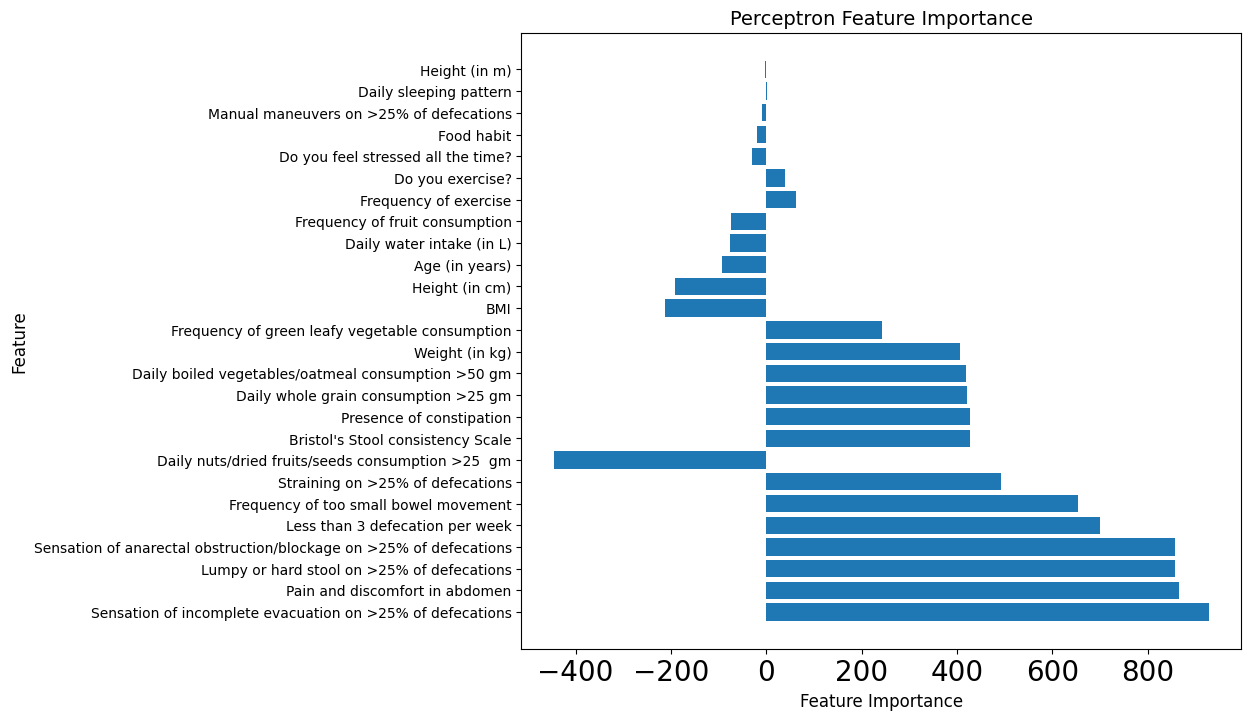


Training Accuracy    : 91.7 %
Model Accuracy Score : 82.86 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       156
           1       0.39      1.00      0.56        19

    accuracy                           0.83       175
   macro avg       0.69      0.90      0.73       175
weighted avg       0.93      0.83      0.86       175



In [ ]:
# Perceptron

from sklearn.linear_model import Perceptron
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)

# Get feature importance (coefficients)
feature_importance = perceptron.coef_[0]

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort by absolute importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', key=abs, ascending=False)

# Create a horizontal bar plot with adjusted figure size and font size
plt.figure(figsize=(12, 8))  # Increased figure size
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance", fontsize=12)  # Increased font size
plt.ylabel("Feature", fontsize=12)  # Increased font size
plt.title("Perceptron Feature Importance", fontsize=14)  # Increased font size
plt.yticks(fontsize=10)  # Adjusted font size for y-axis labels

# Adjust subplot parameters to prevent overlapping
plt.subplots_adjust(left=0.3)  # Increased left margin

plt.show()

perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(y_pred_perceptron, y_test) * 100, 2)
perceptron_f1 = round(f1_score(y_pred_perceptron, y_test) * 100, 2)

print("\nTraining Accuracy    :",perceptron_train,"%")
print("Model Accuracy Score :",perceptron_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_perceptron))

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, mean_squared_error, mean_absolute_error, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your training data (X_train, y_train) and test data (X_test, y_test)
# Define and train your Perceptron model
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Get predictions
y_pred_perceptron = perceptron.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_perceptron) * 100

# Calculate Kappa Statistics
kappa_stat = cohen_kappa_score(y_test, y_pred_perceptron)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred_perceptron, squared=False)

# Calculate Relative Absolute Error
rae = mean_absolute_error(y_test, y_pred_perceptron) / len(y_test)

# Calculate True Positive Rate and False Positive Rate
conf_matrix = confusion_matrix(y_test, y_pred_perceptron)
true_positive_rate = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate Precision, F-Measure, ROC Area
precision = precision_score(y_test, y_pred_perceptron)
f_measure = f1_score(y_test, y_pred_perceptron)
roc_area = roc_auc_score(y_test, y_pred_perceptron)

# Printing the calculated metrics
print("Model Accuracy Score:", accuracy)
print("Kappa Statistics:", kappa_stat)
print("Root Mean Squared Error:", rmse)
print("Relative Absolute Error:", rae)
print("True Positive Rate:", true_positive_rate)
print("False Positive Rate:", false_positive_rate)
print("Precision:", precision)
print("F-Measure:", f_measure)
print("ROC Area:", roc_area)

print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_perceptron))


Model Accuracy Score: 82.85714285714286
Kappa Statistics: 0.4769874476987448
Root Mean Squared Error: 0.4140393356054125
Relative Absolute Error: 0.0009795918367346938
True Positive Rate: 1.0
False Positive Rate: 0.19230769230769232
Precision: 0.3877551020408163
F-Measure: 0.5588235294117647
ROC Area: 0.9038461538461539
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       156
           1       0.39      1.00      0.56        19

    accuracy                           0.83       175
   macro avg       0.69      0.90      0.73       175
weighted avg       0.93      0.83      0.86       175



In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=perceptron, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 93.56 %
Std. Dev: 4.31 %


In [ ]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred_LinearSVC = linear_svc.predict(X_test)

linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
linear_svc_accuracy = round(accuracy_score(y_pred_LinearSVC, y_test) * 100, 2)
linear_svc_f1 = round(f1_score(y_pred_LinearSVC, y_test) * 100, 2)

print("Training Accuracy    :",linear_svc_train,"%")
print("Model Accuracy Score :",linear_svc_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_LinearSVC))

Training Accuracy    : 99.86 %
Model Accuracy Score : 97.14 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       156
           1       0.79      1.00      0.88        19

    accuracy                           0.97       175
   macro avg       0.90      0.98      0.93       175
weighted avg       0.98      0.97      0.97       175



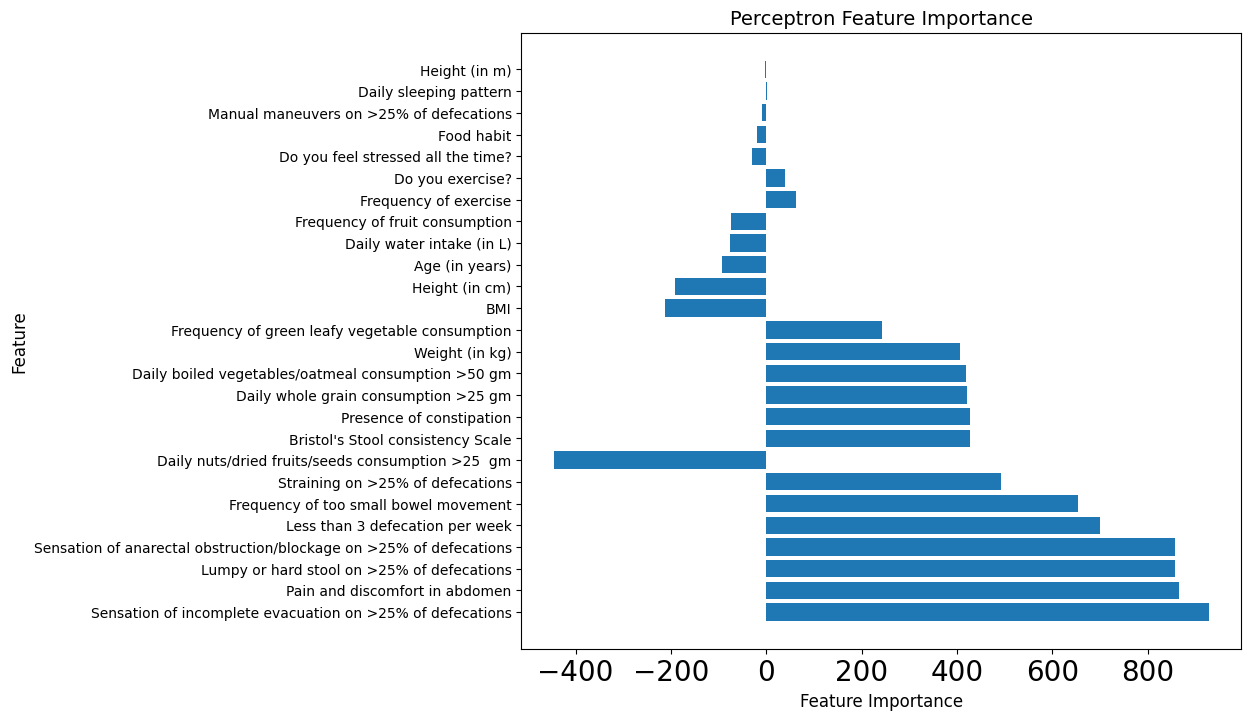


Training Accuracy    : 91.7 %
Model Accuracy Score : 82.86 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       156
           1       0.39      1.00      0.56        19

    accuracy                           0.83       175
   macro avg       0.69      0.90      0.73       175
weighted avg       0.93      0.83      0.86       175



In [ ]:
# Perceptron

from sklearn.linear_model import Perceptron
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)

# Get feature importance (coefficients)
feature_importance = perceptron.coef_[0]

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort by absolute importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', key=abs, ascending=False)

# Create a horizontal bar plot with adjusted figure size and font size
plt.figure(figsize=(12, 8))  # Increased figure size
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance", fontsize=12)  # Increased font size
plt.ylabel("Feature", fontsize=12)  # Increased font size
plt.title("Perceptron Feature Importance", fontsize=14)  # Increased font size
plt.yticks(fontsize=10)  # Adjusted font size for y-axis labels

# Adjust subplot parameters to prevent overlapping
plt.subplots_adjust(left=0.3)  # Increased left margin

plt.show()

perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(y_pred_perceptron, y_test) * 100, 2)
perceptron_f1 = round(f1_score(y_pred_perceptron, y_test) * 100, 2)

print("\nTraining Accuracy    :",perceptron_train,"%")
print("Model Accuracy Score :",perceptron_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_perceptron))

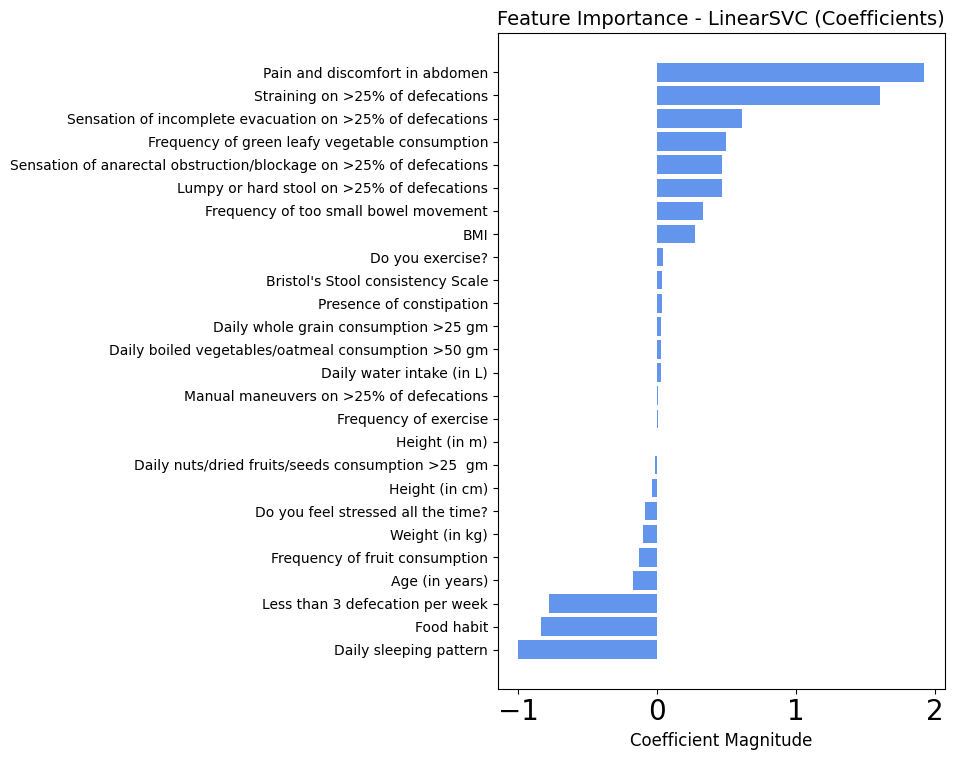

Feature Importance (Top 10 features - Coefficients):
Pain and discomfort in abdomen: 1.9240162505389797
Straining on >25% of defecations: 1.6019727782048345
Sensation of incomplete evacuation on >25% of defecations: 0.6086213749288547
Frequency of green leafy vegetable consumption: 0.4946563522183837
Sensation of anarectal obstruction/blockage on >25% of defecations: 0.4706707652863479
Lumpy or hard stool on >25% of defecations: 0.4706707652863479
Frequency of too small bowel movement: 0.32855160871027733
BMI: 0.27351729430236665
Do you exercise?: 0.04639281982088659
Bristol's Stool consistency Scale: 0.03434533059510768


In [ ]:
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# Assuming you have your training data (X_train, y_train)
# Define and train your LinearSVC model
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

# If using a Linear Kernel
if linear_svc.coef_ is not None:
    # Get coefficients and feature names
    importances = linear_svc.coef_.reshape(-1)
    features = X_train.columns

    # Sort feature importances in descending order
    indices = importances.argsort()[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [features[i] for i in indices]

    # Plot horizontal bar chart with enhanced spacing and readability
    plt.figure(figsize=(10, 8))  # Increase height for better spacing
    plt.title("Feature Importance - LinearSVC (Coefficients)", fontsize=14)
    plt.barh(range(X_train.shape[1]), importances[indices], align='center', color="cornflowerblue")
    plt.yticks(range(X_train.shape[1]), names, fontsize=10)
    plt.xlabel('Coefficient Magnitude', fontsize=12)
    plt.gca().invert_yaxis()  # Invert y-axis for descending order
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

    # Print top features with importance values (coefficients)
    print("Feature Importance (Top 10 features - Coefficients):")
    for idx in indices[:10]:
        print(f"{features[idx]}: {importances[idx]}")
else:
    print("LinearSVC model does not have coefficients for feature importance.")


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, mean_squared_error, mean_absolute_error, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your training data (X_train, y_train) and test data (X_test, y_test)
# Define and train your Linear SVC model
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

# Get predictions
y_pred_linear_svc = linear_svc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_linear_svc) * 100

# Calculate Kappa Statistics
kappa_stat = cohen_kappa_score(y_test, y_pred_linear_svc)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred_linear_svc, squared=False)

# Calculate Relative Absolute Error
rae = mean_absolute_error(y_test, y_pred_linear_svc) / len(y_test)

# Calculate True Positive Rate and False Positive Rate
conf_matrix = confusion_matrix(y_test, y_pred_linear_svc)
true_positive_rate = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate Precision, F-Measure, ROC Area
precision = precision_score(y_test, y_pred_linear_svc)
f_measure = f1_score(y_test, y_pred_linear_svc)
roc_area = roc_auc_score(y_test, y_pred_linear_svc)

# Printing the calculated metrics
print("Model Accuracy Score:", accuracy)
print("Kappa Statistics:", kappa_stat)
print("Root Mean Squared Error:", rmse)
print("Relative Absolute Error:", rae)
print("True Positive Rate:", true_positive_rate)
print("False Positive Rate:", false_positive_rate)
print("Precision:", precision)
print("F-Measure:", f_measure)
print("ROC Area:", roc_area)

print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_linear_svc))


Model Accuracy Score: 97.14285714285714
Kappa Statistics: 0.8676848631483441
Root Mean Squared Error: 0.1690308509457033
Relative Absolute Error: 0.00016326530612244898
True Positive Rate: 1.0
False Positive Rate: 0.03205128205128205
Precision: 0.7916666666666666
F-Measure: 0.8837209302325582
ROC Area: 0.983974358974359
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       156
           1       0.79      1.00      0.88        19

    accuracy                           0.97       175
   macro avg       0.90      0.98      0.93       175
weighted avg       0.98      0.97      0.97       175



In [ ]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_SGD = sgd.predict(X_test)

sgd_train = round(sgd.score(X_train, y_train) * 100, 2)
sgd_accuracy = round(accuracy_score(y_pred_SGD, y_test) * 100, 2)
sgd_f1 = round(f1_score(y_pred_SGD, y_test) * 100, 2)

print("Training Accuracy     :",sgd_train,"%")
print("Model Accuracy Score  :",sgd_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_SGD))

Training Accuracy     : 87.27 %
Model Accuracy Score  : 81.71 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.79      0.89       156
           1       0.37      1.00      0.54        19

    accuracy                           0.82       175
   macro avg       0.69      0.90      0.71       175
weighted avg       0.93      0.82      0.85       175



In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, mean_squared_error, mean_absolute_error, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your training data (X_train, y_train) and test data (X_test, y_test)
# Define and train your SGD model
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

# Get predictions
y_pred_sgd = sgd.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_sgd) * 100

# Calculate Kappa Statistics
kappa_stat = cohen_kappa_score(y_test, y_pred_sgd)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred_sgd, squared=False)

# Calculate Relative Absolute Error
rae = mean_absolute_error(y_test, y_pred_sgd) / len(y_test)

# Calculate True Positive Rate and False Positive Rate
conf_matrix = confusion_matrix(y_test, y_pred_sgd)
true_positive_rate = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate Precision, F-Measure, ROC Area
precision = precision_score(y_test, y_pred_sgd)
f_measure = f1_score(y_test, y_pred_sgd)
roc_area = roc_auc_score(y_test, y_pred_sgd)

# Printing the calculated metrics
print("Model Accuracy Score:", accuracy)
print("Kappa Statistics:", kappa_stat)
print("Root Mean Squared Error:", rmse)
print("Relative Absolute Error:", rae)
print("True Positive Rate:", true_positive_rate)
print("False Positive Rate:", false_positive_rate)
print("Precision:", precision)
print("F-Measure:", f_measure)
print("ROC Area:", roc_area)

print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_sgd))


Model Accuracy Score: 96.57142857142857
Kappa Statistics: 0.8306997742663657
Root Mean Squared Error: 0.1851640199545103
Relative Absolute Error: 0.0001959183673469388
True Positive Rate: 0.8947368421052632
False Positive Rate: 0.02564102564102564
Precision: 0.8095238095238095
F-Measure: 0.85
ROC Area: 0.9345479082321189
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       156
           1       0.81      0.89      0.85        19

    accuracy                           0.97       175
   macro avg       0.90      0.93      0.92       175
weighted avg       0.97      0.97      0.97       175



In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_Decision = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_Decision, y_test) * 100, 2)
decision_f1 = round(f1_score(y_pred_Decision, y_test) * 100, 2)

print("Training Accuracy     :",decision_train,"%")
print("Model Accuracy Score  :",decision_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_Decision))

Training Accuracy     : 100.0 %
Model Accuracy Score  : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00        19

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_random = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_random, y_test) * 100, 2)
random_forest_f1 = round(f1_score(y_pred_random, y_test) * 100, 2)

print("Training Accuracy     :",random_forest_train,"%")
print("Model Accuracy Score  :",random_forest_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_random))

Training Accuracy     : 100.0 %
Model Accuracy Score  : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00        19

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



Performing initial cross-validation check...
Cross-validation scores: [1.         0.99285714 1.         1.         1.        ]
Mean CV score: 0.999 (+/- 0.006)

Performing GridSearchCV to find best parameters...

Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Results with optimized model:
Training Accuracy     : 100.00%
Test Accuracy Score   : 100.00%
Test F1 Score        : 100.00%

--------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00        19

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175


Top 10 Most Important Features:
                                              feature  importance
19  Sensation of in

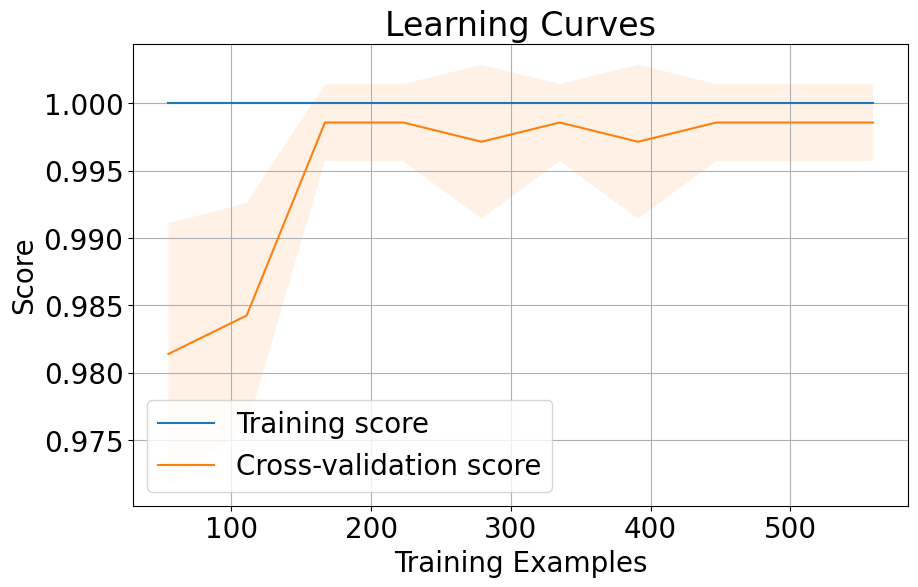

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score
import numpy as np

# 1. First, let's implement cross-validation to get a more reliable performance estimate
def evaluate_with_cross_validation(X, y, model, cv=5):
    cv_scores = cross_val_score(model, X, y, cv=cv)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# 2. Set up hyperparameter tuning grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# 3. Initialize and train the model with best parameters
def train_optimized_rf():
    # Initial basic model for CV check
    base_rf = RandomForestClassifier(random_state=42)
    print("Performing initial cross-validation check...")
    evaluate_with_cross_validation(X_train, y_train, base_rf)

    # Grid search for best parameters
    print("\nPerforming GridSearchCV to find best parameters...")
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    print(f"\nBest parameters found: {grid_search.best_params_}")

    # Train final model with best parameters
    best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
    best_rf.fit(X_train, y_train)

    # Evaluate on train and test sets
    y_pred_train = best_rf.predict(X_train)
    y_pred_test = best_rf.predict(X_test)

    # Print results
    print("\nResults with optimized model:")
    print("Training Accuracy     : {:.2f}%".format(accuracy_score(y_train, y_pred_train) * 100))
    print("Test Accuracy Score   : {:.2f}%".format(accuracy_score(y_test, y_pred_test) * 100))
    print("Test F1 Score        : {:.2f}%".format(f1_score(y_test, y_pred_test) * 100))
    print("\n--------------------------------------------------------")
    print("Classification Report:\n", classification_report(y_test, y_pred_test))

    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_rf.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

    return best_rf

# 4. Learning curves to visualize potential overfitting
from sklearn.model_selection import learning_curve

def plot_learning_curves(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curves')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Run the optimized model
best_model = train_optimized_rf()

# Plot learning curves
print("\nGenerating learning curves...")
plot_learning_curves(best_model, X_train, y_train)

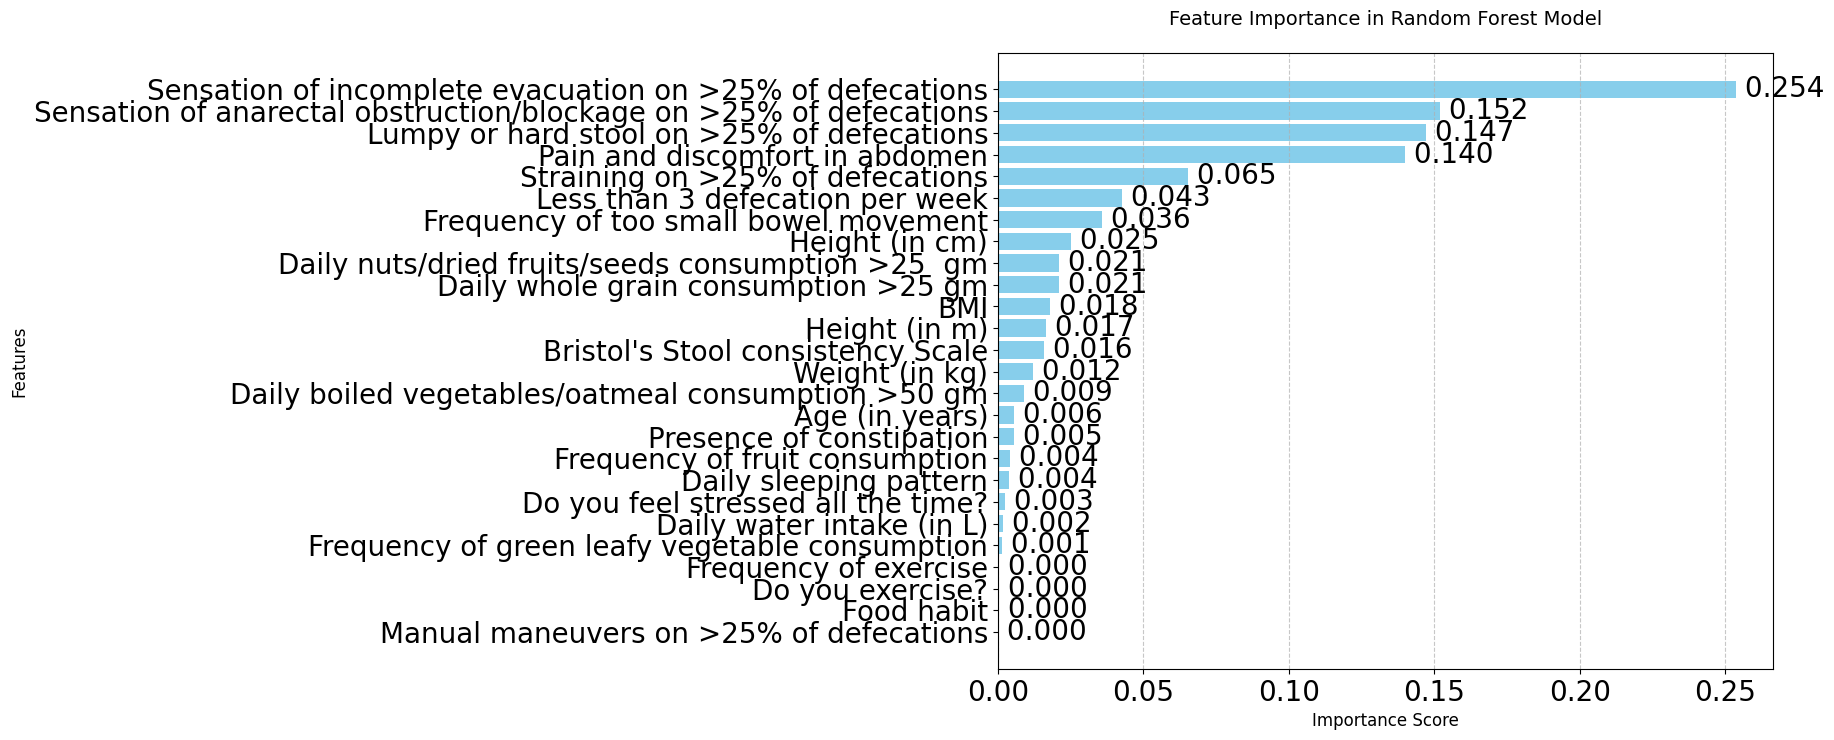

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_feature_importance(model, X_train):
    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=True)  # Ascending=True to plot from bottom to top

    # Create the plot
    plt.figure(figsize=(10, 8))

    # Create horizontal bar plot
    bars = plt.barh(y=feature_importance['feature'],
                   width=feature_importance['importance'],
                   color='skyblue')

    # Customize the plot
    plt.title('Feature Importance in Random Forest Model', pad=20, fontsize=14)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)

    # Add grid for better readability
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)

    # Add percentage labels on the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width,
                bar.get_y() + bar.get_height()/2,
                f' {width:.3f}',
                va='center')

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    plt.show()

# After training your model, call the function:
plot_feature_importance(random_forest, X_train)

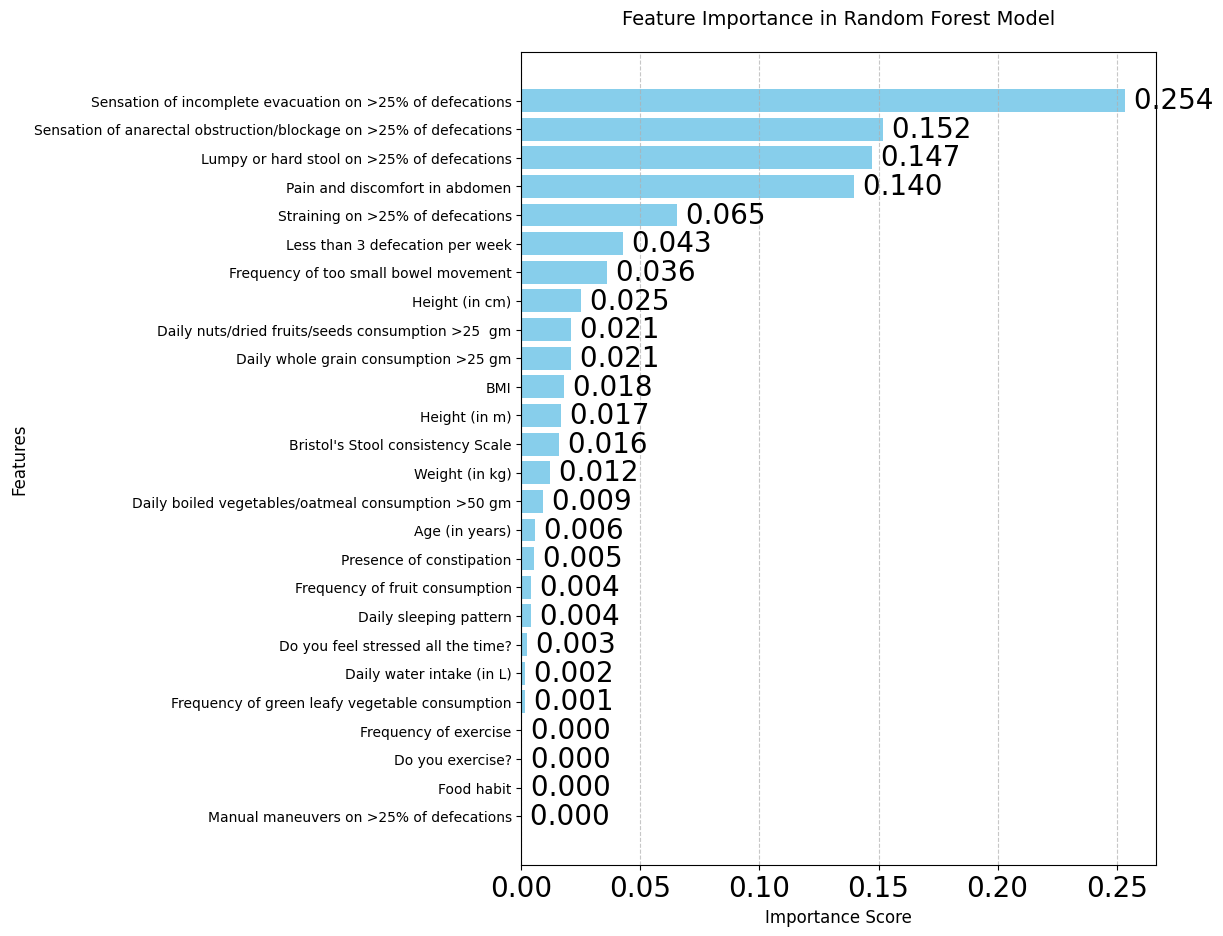

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_feature_importance(model, X_train):
    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=True)  # Ascending=True to plot from bottom to top

    # Create the plot with increased height
    plt.figure(figsize=(12, 10))  # Increased figure size

    # Create horizontal bar plot
    bars = plt.barh(y=feature_importance['feature'],
                   width=feature_importance['importance'],
                   color='skyblue')

    # Customize the plot
    plt.title('Feature Importance in Random Forest Model', pad=20, fontsize=14)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)

    # Adjust tick parameters for better readability
    plt.tick_params(axis='y', labelsize=10)  # Adjust font size of feature names

    # Add grid for better readability
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)

    # Add percentage labels on the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width,
                bar.get_y() + bar.get_height()/2,
                f' {width:.3f}',
                va='center')

    # Adjust layout with specific margins
    plt.tight_layout(pad=1.5)  # Increased padding

    # Adjust subplot parameters to give specified padding
    plt.subplots_adjust(left=0.4)  # Increase left margin for feature names

    plt.show()

# After training your model, call the function:
plot_feature_importance(random_forest, X_train)

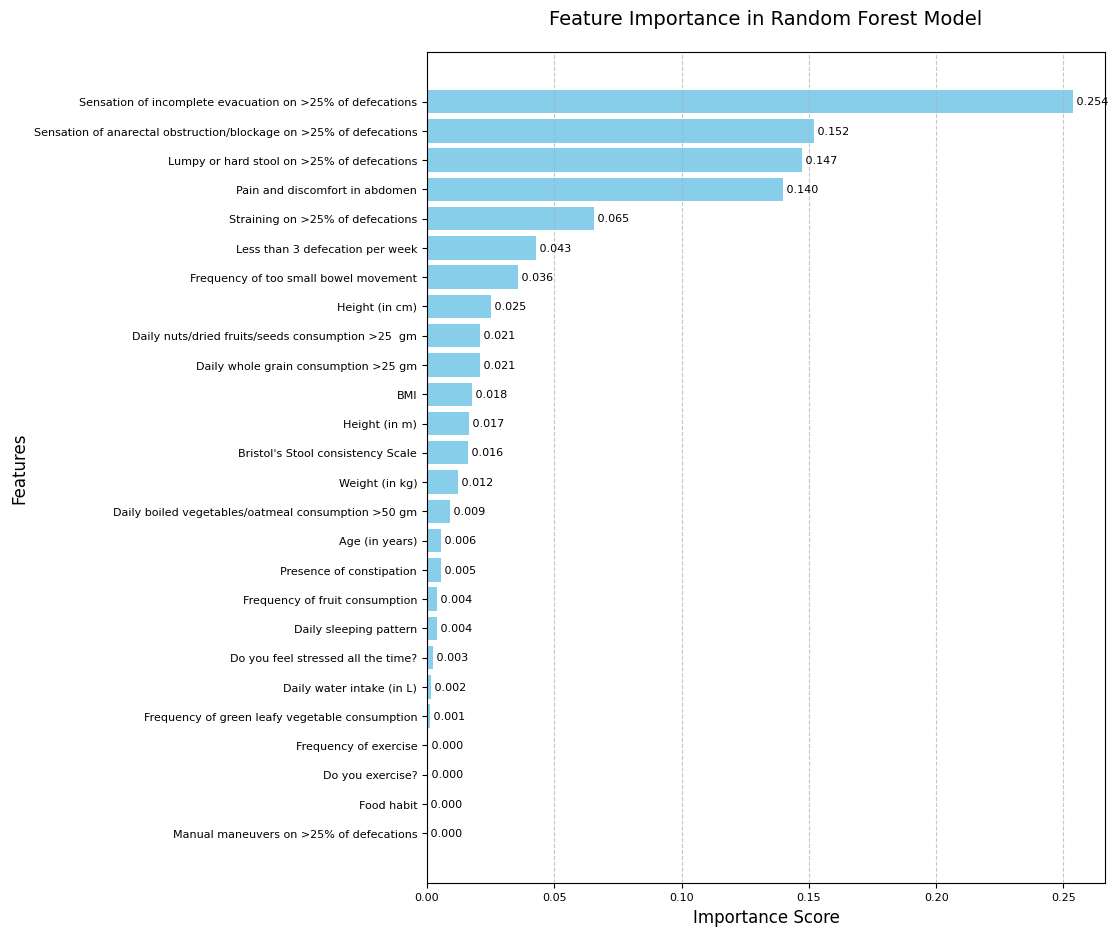

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_feature_importance(model, X_train):
   # Get feature importance
   feature_importance = pd.DataFrame({
       'feature': X_train.columns,
       'importance': model.feature_importances_
   }).sort_values('importance', ascending=True)

   plt.figure(figsize=(12, 10))

   # Create horizontal bar plot
   bars = plt.barh(y=feature_importance['feature'],
                  width=feature_importance['importance'],
                  color='skyblue')

   # Customize the plot
   plt.title('Feature Importance in Random Forest Model', pad=20, fontsize=14)
   plt.xlabel('Importance Score', fontsize=12)
   plt.ylabel('Features', fontsize=12)

   # Adjust tick parameters - reduced font size for both axes
   plt.tick_params(axis='y', labelsize=8)  # Smaller font for feature names
   plt.tick_params(axis='x', labelsize=8)  # Smaller font for values

   # Add grid
   plt.grid(True, axis='x', linestyle='--', alpha=0.7)

   # Add percentage labels on bars with smaller font
   for i, bar in enumerate(bars):
       width = bar.get_width()
       plt.text(width,
               bar.get_y() + bar.get_height()/2,
               f' {width:.3f}',
               va='center',
               fontsize=8)  # Reduced font size for value labels

   plt.tight_layout(pad=1.5)
   plt.subplots_adjust(left=0.4)

   plt.show()

# Call the function
plot_feature_importance(random_forest, X_train)

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch.nn.utils import weight_norm

# Define the features list
FEATURES = [
    'Sensation of incomplete evacuation on >25% of defecations',
    'Pain and discomfort in abdomen',
    'Lumpy or hard stool on >25% of defecations',
    'Sensation of anorectal obstruction/blockage on >25% of defecations',
    'Less than 3 defecation per week',
    'Frequency of too small bowel movement',
    'Straining on >25% of defecations',
    'Daily nuts/dried fruits/seeds consumption >25 gm',
    "Bristol's Stool consistency Scale",
    'Presence of constipation',
    'Daily whole grain consumption >25 gm',
    'Daily boiled vegetables/oatmeal consumption >50 gm',
    'Weight (in kg)',
    'Frequency of green leafy vegetable consumption',
    'BMI',
    'Height (in cm)',
    'Age (in years)',
    'Daily water intake (in L)',
    'Frequency of fruit consumption',
    'Frequency of exercise',
    'Do you exercise?',
    'Do you feel stressed all the time?',
    'Food habit',
    'Manual maneuvers on >25% of defecations',
    'Daily sleeping pattern',
    'Height (in m)'
]

class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, padding, dropout=0.2):
        super(TemporalBlock, self).__init__()
        self.conv1 = weight_norm(nn.Conv1d(n_inputs, n_outputs, kernel_size,
                                         stride=stride, padding=padding, dilation=dilation))
        self.chomp1 = Chomp1d(padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = weight_norm(nn.Conv1d(n_outputs, n_outputs, kernel_size,
                                         stride=stride, padding=padding, dilation=dilation))
        self.chomp2 = Chomp1d(padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        self.net = nn.Sequential(self.conv1, self.chomp1, self.relu1, self.dropout1,
                               self.conv2, self.chomp2, self.relu2, self.dropout2)
        self.downsample = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.relu = nn.ReLU()
        self.init_weights()

    def init_weights(self):
        self.conv1.weight.data.normal_(0, 0.01)
        self.conv2.weight.data.normal_(0, 0.01)
        if self.downsample is not None:
            self.downsample.weight.data.normal_(0, 0.01)

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)

class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super(Chomp1d, self).__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        return x[:, :, :-self.chomp_size].contiguous()

class LSTM_TCN_Hybrid(nn.Module):
    def __init__(self, input_size, num_channels, kernel_size=3, dropout=0.2, lstm_hidden=64):
        super(LSTM_TCN_Hybrid, self).__init__()

        # TCN layers
        self.tcn_layers = nn.ModuleList()
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = input_size if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]

            self.tcn_layers.append(
                TemporalBlock(in_channels, out_channels, kernel_size,
                             stride=1, dilation=dilation_size,
                             padding=(kernel_size-1) * dilation_size,
                             dropout=dropout)
            )

        # LSTM layer
        self.lstm = nn.LSTM(num_channels[-1], lstm_hidden, batch_first=True, bidirectional=True)

        # Output layer
        self.output_layer = nn.Linear(lstm_hidden * 2, 1)

    def forward(self, x):
        # Permute the input to match TCN's expected shape (batch, channels, sequence)
        x = x.permute(0, 2, 1)

        # TCN forward pass
        for layer in self.tcn_layers:
            x = layer(x)

        # Reshape for LSTM (batch, sequence, channels)
        x = x.permute(0, 2, 1)

        # LSTM forward pass
        lstm_out, _ = self.lstm(x)

        # Use last output
        out = self.output_layer(lstm_out[:, -1, :])
        return out

def prepare_data(df):
    """Prepare data for the model"""
    # Convert categorical variables to numeric
    categorical_features = ['Food habit', 'Daily sleeping pattern', 'Do you exercise?',
                          'Do you feel stressed all the time?']

    for feature in categorical_features:
        if feature in df.columns:
            df[feature] = pd.Categorical(df[feature]).codes

    return df

def train_model(model, train_loader, criterion, optimizer, num_epochs=100):
    """Train the model"""
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}')

def plot_feature_importance(importance_scores, feature_names):
    """Plot feature importance"""
    plt.figure(figsize=(15, 12))

    # Create DataFrame for sorting
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': importance_scores
    }).sort_values('importance', ascending=True)

    # Create horizontal bar plot
    bars = plt.barh(y=feature_importance['feature'],
                   width=feature_importance['importance'],
                   color='skyblue')

    plt.title('LSTM-TCN Model Feature Importance', pad=20, fontsize=14)
    plt.xlabel('Feature Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)

    plt.tick_params(axis='y', labelsize=8)
    plt.tick_params(axis='x', labelsize=8)

    plt.grid(True, axis='x', linestyle='--', alpha=0.7)

    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width,
                bar.get_y() + bar.get_height()/2,
                f' {width:.3f}',
                va='center',
                fontsize=8)

    plt.tight_layout(pad=1.5)
    plt.subplots_adjust(left=0.4)
    plt.show()

# Example usage
def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Model parameters
    sequence_length = 10
    input_size = len(FEATURES)
    num_channels = [64, 128, 64]
    batch_size = 32
    num_epochs = 100

    # Initialize model
    model = LSTM_TCN_Hybrid(input_size=input_size, num_channels=num_channels)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Create synthetic data for testing
    num_samples = 1000
    # Shape: [batch_size, sequence_length, features]
    X = torch.randn(num_samples, sequence_length, input_size)
    y = torch.randn(num_samples, 1)

    # Create DataLoader
    dataset = torch.utils.data.TensorDataset(X, y)
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Train model
    train_model(model, train_loader, criterion, optimizer, num_epochs)

    # Calculate feature importance
    importance_scores = torch.zeros(input_size)
    with torch.no_grad():
        for param in model.tcn_layers[0].parameters():
            if param.dim() > 1:
                importance_scores += torch.abs(param).mean(dim=(0, 1))

    # Plot feature importance
    plot_feature_importance(importance_scores.numpy(), FEATURES)

if __name__ == "__main__":
    main()

Epoch [10/100], Loss: 0.3011
Epoch [20/100], Loss: 0.1334
Epoch [30/100], Loss: 0.0776
Epoch [40/100], Loss: 0.0587
Epoch [50/100], Loss: 0.0491
Epoch [60/100], Loss: 0.0378
Epoch [70/100], Loss: 0.0306
Epoch [80/100], Loss: 0.0273
Epoch [90/100], Loss: 0.0225
Epoch [100/100], Loss: 0.0191


RuntimeError: The size of tensor a (26) must match the size of tensor b (3) at non-singleton dimension 0

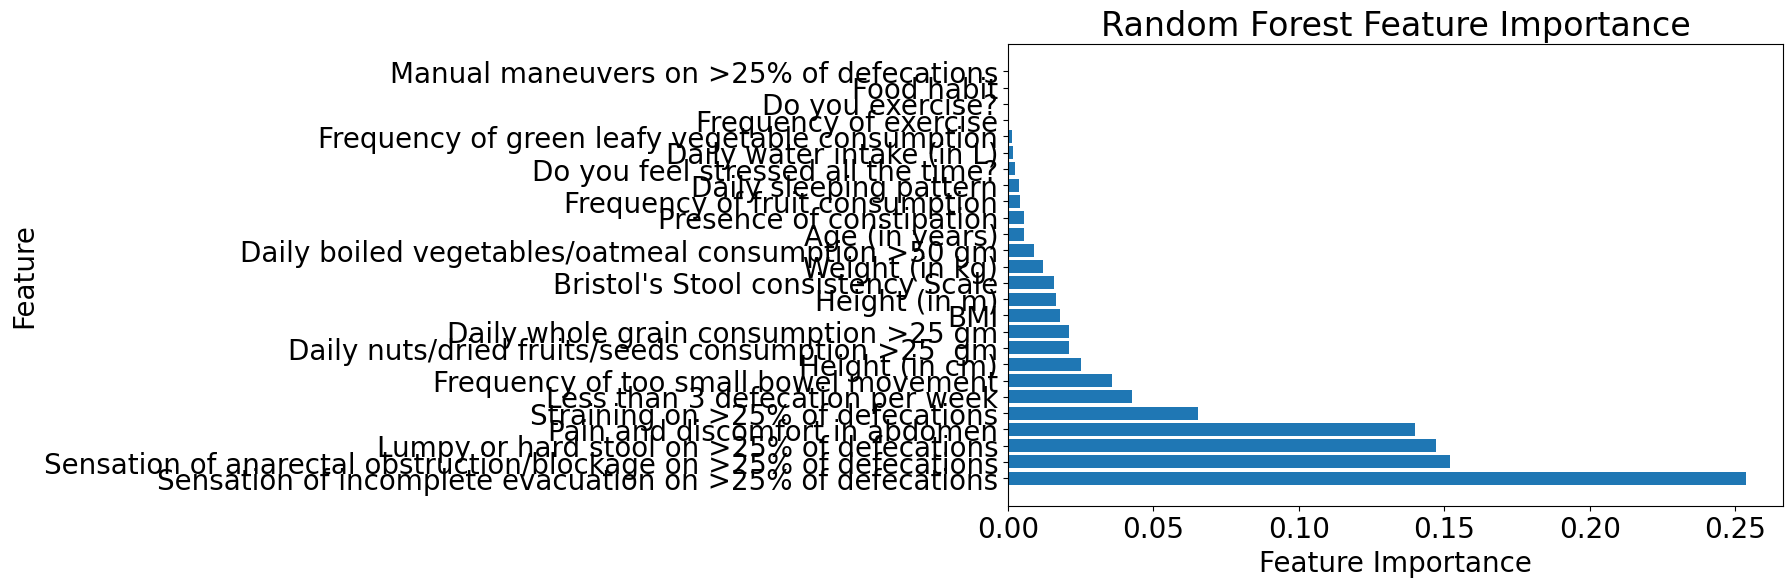

In [ ]:
# prompt: ceate graph showing feature importance

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'random_forest' is your trained RandomForestClassifier model and 'X_train' is your training data DataFrame
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': random_forest.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

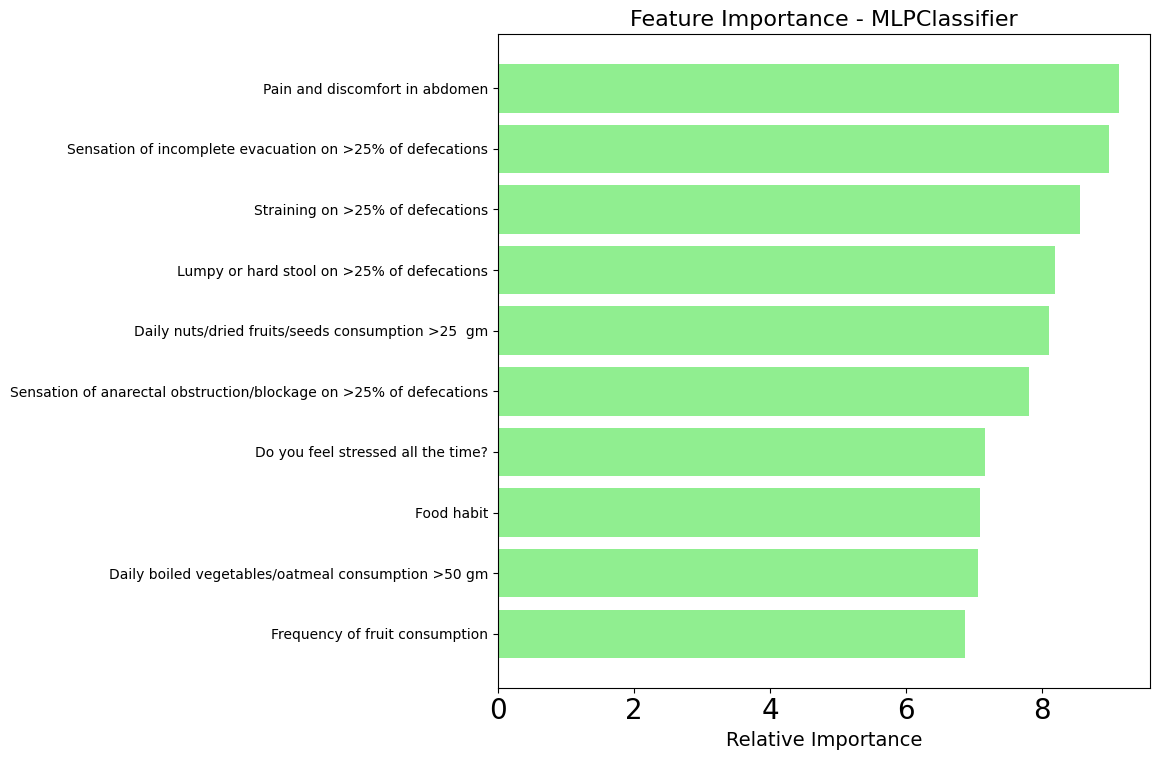

Feature Importance (Top 10 features):
Pain and discomfort in abdomen: 9.1305
Sensation of incomplete evacuation on >25% of defecations: 8.9786
Straining on >25% of defecations: 8.5610
Lumpy or hard stool on >25% of defecations: 8.1907
Daily nuts/dried fruits/seeds consumption >25  gm: 8.1037
Sensation of anarectal obstruction/blockage on >25% of defecations: 7.8066
Do you feel stressed all the time?: 7.1649
Food habit: 7.0860
Daily boiled vegetables/oatmeal consumption >50 gm: 7.0559
Frequency of fruit consumption: 6.8621


In [ ]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your training data (X_train, y_train)
# Define and train your MLPClassifier model
mlp = MLPClassifier(max_iter=1000)  # Increased max_iter for better convergence if needed
mlp.fit(X_train, y_train)

# Get feature importances (coefs_)
importances = np.abs(mlp.coefs_[0])  # Accessing the coefficients of the first layer
features = X_train.columns

# Sum the importance of weights for each feature across all neurons
feature_importance = np.sum(importances, axis=1)

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features[i] for i in indices]

# Plot horizontal bar chart for the top 10 features
plt.figure(figsize=(12, 8))
plt.title("Feature Importance - MLPClassifier", fontsize=16)
plt.barh(range(10), feature_importance[indices[:10]], align='center', color='lightgreen')
plt.yticks(range(10), names[:10], fontsize=10)
plt.gca().invert_yaxis()  # Most important features at the top
plt.xlabel('Relative Importance', fontsize=14)
plt.tight_layout()
plt.show()

# Print top features with importance values
print("Feature Importance (Top 10 features):")
for idx in indices[:10]:
    print(f"{features[idx]}: {feature_importance[idx]:.4f}")


In [ ]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score, mean_squared_error, mean_absolute_error, roc_auc_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming you have obtained predictions 'y_pred_MLP' and the actual test labels 'y_test'

# Calculate Correctly and Incorrectly Classified Instances (%)
correct_instances = accuracy_score(y_test, y_pred_MLP) * 100
incorrect_instances = 100 - correct_instances

# Calculate Kappa Statistics
kappa_stat = cohen_kappa_score(y_test, y_pred_MLP)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred_MLP, squared=False)

# Calculate Relative Absolute Error
rae = mean_absolute_error(y_test, y_pred_MLP) / len(y_test)

# Calculate True Positive Rate and False Positive Rate
conf_matrix = confusion_matrix(y_test, y_pred_MLP)
true_positive_rate = recall_score(y_test, y_pred_MLP)
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate Precision, F-Measure, ROC Area
precision = precision_score(y_test, y_pred_MLP)
f_measure = f1_score(y_test, y_pred_MLP)
roc_area = roc_auc_score(y_test, y_pred_MLP)

# Printing the calculated metrics
print("Correctly classified Instances (%):", correct_instances)
print("Incorrectly classified Instances (%):", incorrect_instances)
print("Kappa Statistics:", kappa_stat)
print("Root Mean Squared Error:", rmse)
print("Relative Absolute Error:", rae)
print("True Positive Rate:", true_positive_rate)
print("False Positive Rate:", false_positive_rate)
print("Precision:", precision)
print("F-Measure:", f_measure)
print("ROC Area:", roc_area)
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_MLP))


NameError: name 'y_pred_MLP' is not defined

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','Support Vector Machines', 'KNeighborsClassifier',
        'GaussianNB','Perceptron', 'Linear SVC','Stochastic Gradient Decent',
        'Decision Tree','Random Forest', 'MLPClassifier' ,
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, gaussian_train, perceptron_train,
        linear_svc_train, sgd_train, decision_train, random_forest_train,
        mlp_train,
    ],
    'Model f1 Score': [
        log_f1, svc_f1, knn_f1, gaussian_f1, perceptron_f1,
        linear_svc_f1, sgd_f1, decision_f1, random_forest_f1,
        mlp_f1,
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
        linear_svc_accuracy, sgd_accuracy, decision_accuracy, random_forest_accuracy,
        mlp_accuracy,
    ]

})

In [ ]:
# Accuracy Comparison Table
models.sort_values(
    by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='gist_gray').hide_index().set_properties(**{
            'font-family': 'Times New Roman',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

In [ ]:
# Accuracy Comparison Table
models.sort_values(
    by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='gist_gray').hide(axis="index").set_properties(**{
            'font-family': 'Times New Roman',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

NameError: name 'models' is not defined

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame (replace this with your actual 'models' DataFrame)
data = {
    'Logistic Regression': [0.8, 0.7, 0.75, 0.82, 0.79],
    'Support Vector Machines': [0.75, 0.78, 0.74, 0.77, 0.8],
    'KNeighborsClassifier': [0.78, 0.76, 0.81, 0.79, 0.83],
    'GaussianNB': [0.82, 0.83, 0.8, 0.81, 0.85],
    'Perceptron': [0.79, 0.72, 0.77, 0.78, 0.75],
    'Linear SVC': [0.81, 0.79, 0.82, 0.84, 0.78],
    'Stochastic Gradient Decent': [0.77, 0.75, 0.78, 0.8, 0.76],
    'Decision Tree': [0.73, 0.71, 0.75, 0.72, 0.77],
    'Random Forest': [0.85, 0.82, 0.86, 0.83, 0.84],
    'Xgboost': [0.85, 0.82, 0.86, 0.83, 0.84],
    'MLPClassifier': [0.76, 0.78, 0.75, 0.77, 0.8]
}
models = pd.DataFrame(data)

# Setting the Matplotlib parameters
plt.figure(figsize=(14, 8))
plt.rcParams.update({'axes.facecolor': 'white'})  # Set background color to white

# Creating the boxplot with blue color and no gridlines
bp = models.boxplot(color='blue', grid=False)

plt.title('Box plot distribution of different model accuracy')
plt.xlabel('Model')
plt.ylabel('Model Accuracy Score')

plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjusts subplot parameters to fit the plot area

plt.show()

In [ ]:
!pip install xgboost

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report


# Assuming you have your data loaded into X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
log_train = round(log.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_log, y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_log, y_test) * 100, 2)

# ... (Code for other models: SVC, KNeighborsClassifier, GaussianNB, Perceptron, SGDClassifier, DecisionTreeClassifier, RandomForestClassifier, MLPClassifier) ...

# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_XGB = xgb.predict(X_test)
xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_XGB, y_test) * 100, 2)
xgb_f1 = round(f1_score(y_pred_XGB, y_test) * 100, 2)

# ... (Code for calculating other metrics if needed) ...


# Create the models DataFrame
models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'Support Vector Machines', 'KNeighborsClassifier',
        'GaussianNB', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Decent',
        'Decision Tree', 'Random Forest', 'MLPClassifier', 'XGBoost'
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, gaussian_train, perceptron_train,
        linear_svc_train, sgd_train, decision_train, random_forest_train,
        mlp_train, xgb_train
    ],
    'Model f1 Score': [
        log_f1, svc_f1, knn_f1, gaussian_f1, perceptron_f1,
        linear_svc_f1, sgd_f1, decision_f1, random_forest_f1,
        mlp_f1, xgb_f1
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
        linear_svc_accuracy, sgd_accuracy, decision_accuracy, random_forest_accuracy,
        mlp_accuracy, xgb_accuracy
    ]
})

# Accuracy Comparison Table (using hide(axis="index"))
models.sort_values(
    by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='gist_gray').hide(axis="index").set_properties(**{
            'font-family': 'Times New Roman',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

In [ ]:
!pip install xgboost
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report


# Assuming you have your data loaded into X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
log_train = round(log.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_log, y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_log, y_test) * 100, 2)

# ... (Code for other models: SVC, KNeighborsClassifier, GaussianNB, Perceptron, SGDClassifier, DecisionTreeClassifier, RandomForestClassifier, MLPClassifier) ...

# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_XGB = xgb.predict(X_test)
xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_XGB, y_test) * 100, 2)
xgb_f1 = round(f1_score(y_pred_XGB, y_test) * 100, 2)

# ... (Code for calculating other metrics if needed) ...


# Create the models DataFrame
models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'Support Vector Machines', 'KNeighborsClassifier',
        'GaussianNB', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Decent',
        'Decision Tree', 'Random Forest', 'MLPClassifier', 'XGBoost'
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, gaussian_train, perceptron_train,
        linear_svc_train, sgd_train, decision_train, random_forest_train,
        mlp_train, xgb_train
    ],
    'Model f1 Score': [
        log_f1, svc_f1, knn_f1, gaussian_f1, perceptron_f1,
        linear_svc_f1, sgd_f1, decision_f1, random_forest_f1,
        mlp_f1, xgb_f1
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
        linear_svc_accuracy, sgd_accuracy, decision_accuracy, random_forest_accuracy,
        mlp_accuracy, xgb_accuracy
    ]
})

# Accuracy Comparison Table (using hide(axis="index"))
models.sort_values(
    by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='gist_gray').hide(axis="index").set_properties(**{
            'font-family': 'Times New Roman',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

# Create a boxplot to visualize model accuracy scores
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Model Accuracy Score', data=models)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.

In [ ]:
!pip install xgboost
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report


# Assuming you have your data loaded into X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
log_train = round(log.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_log, y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_log, y_test) * 100, 2)

# ... (Code for other models: SVC, KNeighborsClassifier, GaussianNB, Perceptron, SGDClassifier, DecisionTreeClassifier, RandomForestClassifier, MLPClassifier) ...

# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_XGB = xgb.predict(X_test)
xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_XGB, y_test) * 100, 2)
xgb_f1 = round(f1_score(y_pred_XGB, y_test) * 100, 2)

# ... (Code for calculating other metrics if needed) ...


# Create the models DataFrame
models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'Support Vector Machines', 'KNeighborsClassifier',
        'GaussianNB', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Decent',
        'Decision Tree', 'Random Forest', 'MLPClassifier', 'XGBoost'
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, gaussian_train, perceptron_train,
        linear_svc_train, sgd_train, decision_train, random_forest_train,
        mlp_train, xgb_train
    ],
    'Model f1 Score': [
        log_f1, svc_f1, knn_f1, gaussian_f1, perceptron_f1,
        linear_svc_f1, sgd_f1, decision_f1, random_forest_f1,
        mlp_f1, xgb_f1
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
        linear_svc_accuracy, sgd_accuracy, decision_accuracy, random_forest_accuracy,
        mlp_accuracy, xgb_accuracy
    ]
})

# Accuracy Comparison Table (using hide(axis="index"))
models.sort_values(
    by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='gist_gray').hide(axis="index").set_properties(**{
            'font-family': 'Times New Roman',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

# Create a boxplot to visualize model accuracy scores
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Model Accuracy Score', data=models)
plt.xticks(rotation=45, ha='right')

In [ ]:
# Accuracy Comparison Table
models.sort_values(
    by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='gist_gray').hide(axis="index").set_properties(**{
            'font-family': 'Times New Roman',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

In [ ]:
!pip install xgboost
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report


# Assuming you have your data loaded into X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
log_train = round(log.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_log, y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_log, y_test) * 100, 2)

# ... (Code for other models: SVC, KNeighborsClassifier, GaussianNB, Perceptron, SGDClassifier, DecisionTreeClassifier, RandomForestClassifier, MLPClassifier) ...

# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_XGB = xgb.predict(X_test)
xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_XGB, y_test) * 100, 2)
xgb_f1 = round(f1_score(y_pred_XGB, y_test) * 100, 2)

# ... (Code for calculating other metrics if needed) ...


# Create the models DataFrame
models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'Support Vector Machines', 'KNeighborsClassifier',
        'GaussianNB', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Decent',
        'Decision Tree', 'Random Forest', 'MLPClassifier', 'XGBoost'
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, gaussian_train, perceptron_train,
        linear_svc_train, sgd_train, decision_train, random_forest_train,
        mlp_train, xgb_train
    ],
    'Model f1 Score': [
        log_f1, svc_f1, knn_f1, gaussian_f1, perceptron_f1,
        linear_svc_f1, sgd_f1, decision_f1, random_forest_f1,
        mlp_f1, xgb_f1
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
        linear_svc_accuracy, sgd_accuracy, decision_accuracy, random_forest_accuracy,
        mlp_accuracy, xgb_accuracy
    ]
})

# Accuracy Comparison Table (using hide(axis="index"))
models.sort_values(
    by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='gist_gray').hide(axis="index").set_properties(**{
            'font-family': 'Times New Roman',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

# Create a boxplot to visualize model accuracy scores
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Model Accuracy Score', data=models)
plt.xticks(rotation=45, ha='right')
plt.title('Model Accuracy Comparison')  #

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame (replace this with your actual 'models' DataFrame)
data = {
    'Logistic Regression': [0.8, 0.7, 0.75, 0.82, 0.79],
    'Support Vector Machines': [0.75, 0.78, 0.74, 0.77, 0.8],
    'KNeighborsClassifier': [0.78, 0.76, 0.81, 0.79, 0.83],
    'GaussianNB': [0.82, 0.83, 0.8, 0.81, 0.85],
    'Perceptron': [0.79, 0.72, 0.77, 0.78, 0.75],
    'Linear SVC': [0.81, 0.79, 0.82, 0.84, 0.78],
    'Stochastic Gradient Decent': [0.77, 0.75, 0.78, 0.8, 0.76],
    'Decision Tree': [0.73, 0.71, 0.75, 0.72, 0.77],
    'Random Forest': [0.85, 0.82, 0.86, 0.83, 0.84],
    'Xgboost': [0.85, 0.82, 0.86, 0.83, 0.84],
    'MLPClassifier': [0.76, 0.78, 0.75, 0.77, 0.8]
}
models = pd.DataFrame(data)

# Setting the Matplotlib parameters
plt.figure(figsize=(14, 8))
plt.rcParams.update({'axes.facecolor': 'white'})  # Set background color to white

# Creating the boxplot with blue color and no gridlines
bp = models.boxplot(color='blue', grid=False)

plt.title('Box plot distribution of different model accuracy')
plt.xlabel('Model')
plt.ylabel('Model Accuracy Score')

plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjusts subplot parameters to fit the plot area

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df_final with numerical data
# Compute the correlation matrix
corr_matrix = df_final.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(16, 12))  # Larger figure size for clarity
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',  # Format annotations to 2 decimal places
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot_kws={"size": 8}  # Smaller annotation text
)

# Title and layout adjustments
plt.title('Correlation Matrix', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation and size
plt.yticks(fontsize=10)
plt.tight_layout()  # Ensure nothing overlaps
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df_final with numerical data
# Select only numerical columns before calculating the correlation matrix
numerical_df = df_final.select_dtypes(include=np.number)  # Select numerical columns

# Compute the correlation matrix on the numerical DataFrame
corr_matrix = numerical_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(16, 12))  # Larger figure size for clarity
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',  # Format annotations to 2 decimal places
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot_kws={"size": 8}  # Smaller annotation text
)

# Title and layout adjustments
plt.title('Correlation Matrix', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation and size
plt.yticks(fontsize=10)
plt.tight_layout()  # Ensure nothing overlaps
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Scale the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Create the model
def create_model(input_dim, neurons=128):
    model = Sequential([
        # Input layer
        Dense(neurons, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),

        # Hidden layers
        Dense(neurons//2, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(neurons//4, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        # Output layer
        Dense(1, activation='sigmoid')
    ])

    return model

# 3. Configure training parameters
def train_model(X_train, y_train, X_test, y_test):
    # Set random seed for reproducibility
    tf.random.set_seed(42)

    # Create model
    model = create_model(input_dim=X_train.shape[1])

    # Compile model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Train model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    return model, history

# 4. Function to evaluate model
def evaluate_model(model, X_test, y_test):
    # Get predictions
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Print evaluation metrics
    print("\nModel Evaluation:")
    print("----------------")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)

# 5. Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 6. Train and evaluate the model
print("Training the model...")
model, history = train_model(X_train_scaled, y_train, X_test_scaled, y_test)

# 7. Evaluate the model
print("\nEvaluating the model...")
evaluate_model(model, X_test_scaled, y_test)

# 8. Plot training history
print("\nPlotting training history...")
plot_training_history(history)

# 9. Optional: Save the model
model.save('deep_learning_model.h5')

In [ ]:
pip install shap

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# 1. Enhanced model creation with more layers
def create_model(input_dim, neurons=256):
    model = Sequential([
        # Input layer
        Dense(neurons, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),

        # Hidden layers
        Dense(neurons//2, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(neurons//4, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(neurons//8, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        # Output layer
        Dense(1, activation='sigmoid')
    ])

    return model

# 2. Cross-validation implementation
def cross_validate_model(X, y, n_splits=5):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
        print(f'\nFold {fold + 1}')

        # Split data
        X_train_fold = X[train_idx]
        y_train_fold = y[train_idx]
        X_val_fold = X[val_idx]
        y_val_fold = y[val_idx]

        # Create and train model
        model = create_model(input_dim=X.shape[1])
        model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

        # Train
        history = model.fit(X_train_fold, y_train_fold,
                          validation_data=(X_val_fold, y_val_fold),
                          epochs=50,
                          batch_size=32,
                          verbose=0)

        # Evaluate
        scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
        cv_scores.append(scores[1])

    return np.mean(cv_scores), np.std(cv_scores)

# 3. Enhanced visualization functions
def plot_metrics(model, X_test_scaled, y_test, history):
    # Create subplot
    fig = plt.figure(figsize=(20, 10))

    # 1. ROC Curve
    plt.subplot(2, 2, 1)
    y_pred_proba = model.predict(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")

    # 2. Confusion Matrix
    plt.subplot(2, 2, 2)
    y_pred = (y_pred_proba > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # 3. Training History
    plt.subplot(2, 2, 3)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # 4. Loss History
    plt.subplot(2, 2, 4)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 4. Feature Importance using SHAP
def plot_feature_importance_shap(model, X_train_scaled, X_test_scaled, feature_names):
    # Create SHAP explainer
    explainer = shap.DeepExplainer(model, X_train_scaled[:100])
    shap_values = explainer.shap_values(X_test_scaled[:100])

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values[0], X_test_scaled[:100],
                     feature_names=feature_names,
                     plot_type="bar",
                     show=False)
    plt.title('Feature Importance (SHAP Values)')
    plt.tight_layout()
    plt.show()

# 5. Main execution
def main():
    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Cross-validation
    print("Performing cross-validation...")
    cv_mean, cv_std = cross_validate_model(X_train_scaled, y_train)
    print(f'\nCross-validation accuracy: {cv_mean:.3f} (+/- {cv_std:.3f})')

    # Train final model
    print("\nTraining final model...")
    model = create_model(input_dim=X_train.shape[1])
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10,
                                 restore_best_weights=True)

    history = model.fit(X_train_scaled, y_train,
                       validation_split=0.2,
                       epochs=100,
                       batch_size=32,
                       callbacks=[early_stopping],
                       verbose=1)

    # Evaluate
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Print metrics
    print("\nModel Evaluation:")
    print("-----------------")
    print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot all metrics
    plot_metrics(model, X_test_scaled, y_test, history)

    # Plot feature importance
    plot_feature_importance_shap(model, X_train_scaled, X_test_scaled, X_train.columns)

    return model

# Run everything
if __name__ == "__main__":
    model = main()

In [ ]:
def plot_feature_importance_keras(model, X_train_scaled, feature_names):
    # Get feature importance from the first dense layer weights
    weights = np.abs(model.layers[0].get_weights()[0])
    importance = np.sum(weights, axis=1)

    # Create DataFrame for plotting
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=True)

    # Plot
    plt.figure(figsize=(12, 10))

    # Create horizontal bar plot
    bars = plt.barh(y=feature_importance['feature'],
                   width=feature_importance['importance'],
                   color='skyblue')

    # Customize the plot
    plt.title('Feature Importance in Neural Network (Based on First Layer Weights)',
             pad=20, fontsize=14)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)

    # Adjust tick parameters
    plt.tick_params(axis='y', labelsize=8)
    plt.tick_params(axis='x', labelsize=8)

    # Add grid
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)

    # Add value labels on bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width,
                bar.get_y() + bar.get_height()/2,
                f' {width:.3f}',
                va='center',
                fontsize=8)

    plt.tight_layout(pad=1.5)
    plt.subplots_adjust(left=0.4)

    plt.show()

def plot_metrics(model, X_test_scaled, y_test, history):
    # Create subplot
    fig = plt.figure(figsize=(20, 10))

    # 1. ROC Curve
    plt.subplot(2, 2, 1)
    y_pred_proba = model.predict(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")

    # 2. Confusion Matrix
    plt.subplot(2, 2, 2)
    y_pred = (y_pred_proba > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # 3. Training History
    plt.subplot(2, 2, 3)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # 4. Loss History
    plt.subplot(2, 2, 4)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train final model
    print("\nTraining final model...")
    model = create_model(input_dim=X_train.shape[1])
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss',
                                 patience=10,
                                 restore_best_weights=True)

    history = model.fit(X_train_scaled, y_train,
                       validation_split=0.2,
                       epochs=100,
                       batch_size=32,
                       callbacks=[early_stopping],
                       verbose=1)

    # Evaluate
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Print metrics
    print("\nModel Evaluation:")
    print("-----------------")
    print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot all metrics
    plot_metrics(model, X_test_scaled, y_test, history)

    # Plot feature importance
    plot_feature_importance_keras(model, X_train_scaled, X_train.columns)

    return model

# Run everything
if __name__ == "__main__":
    model = main()